# 幅度相位6图

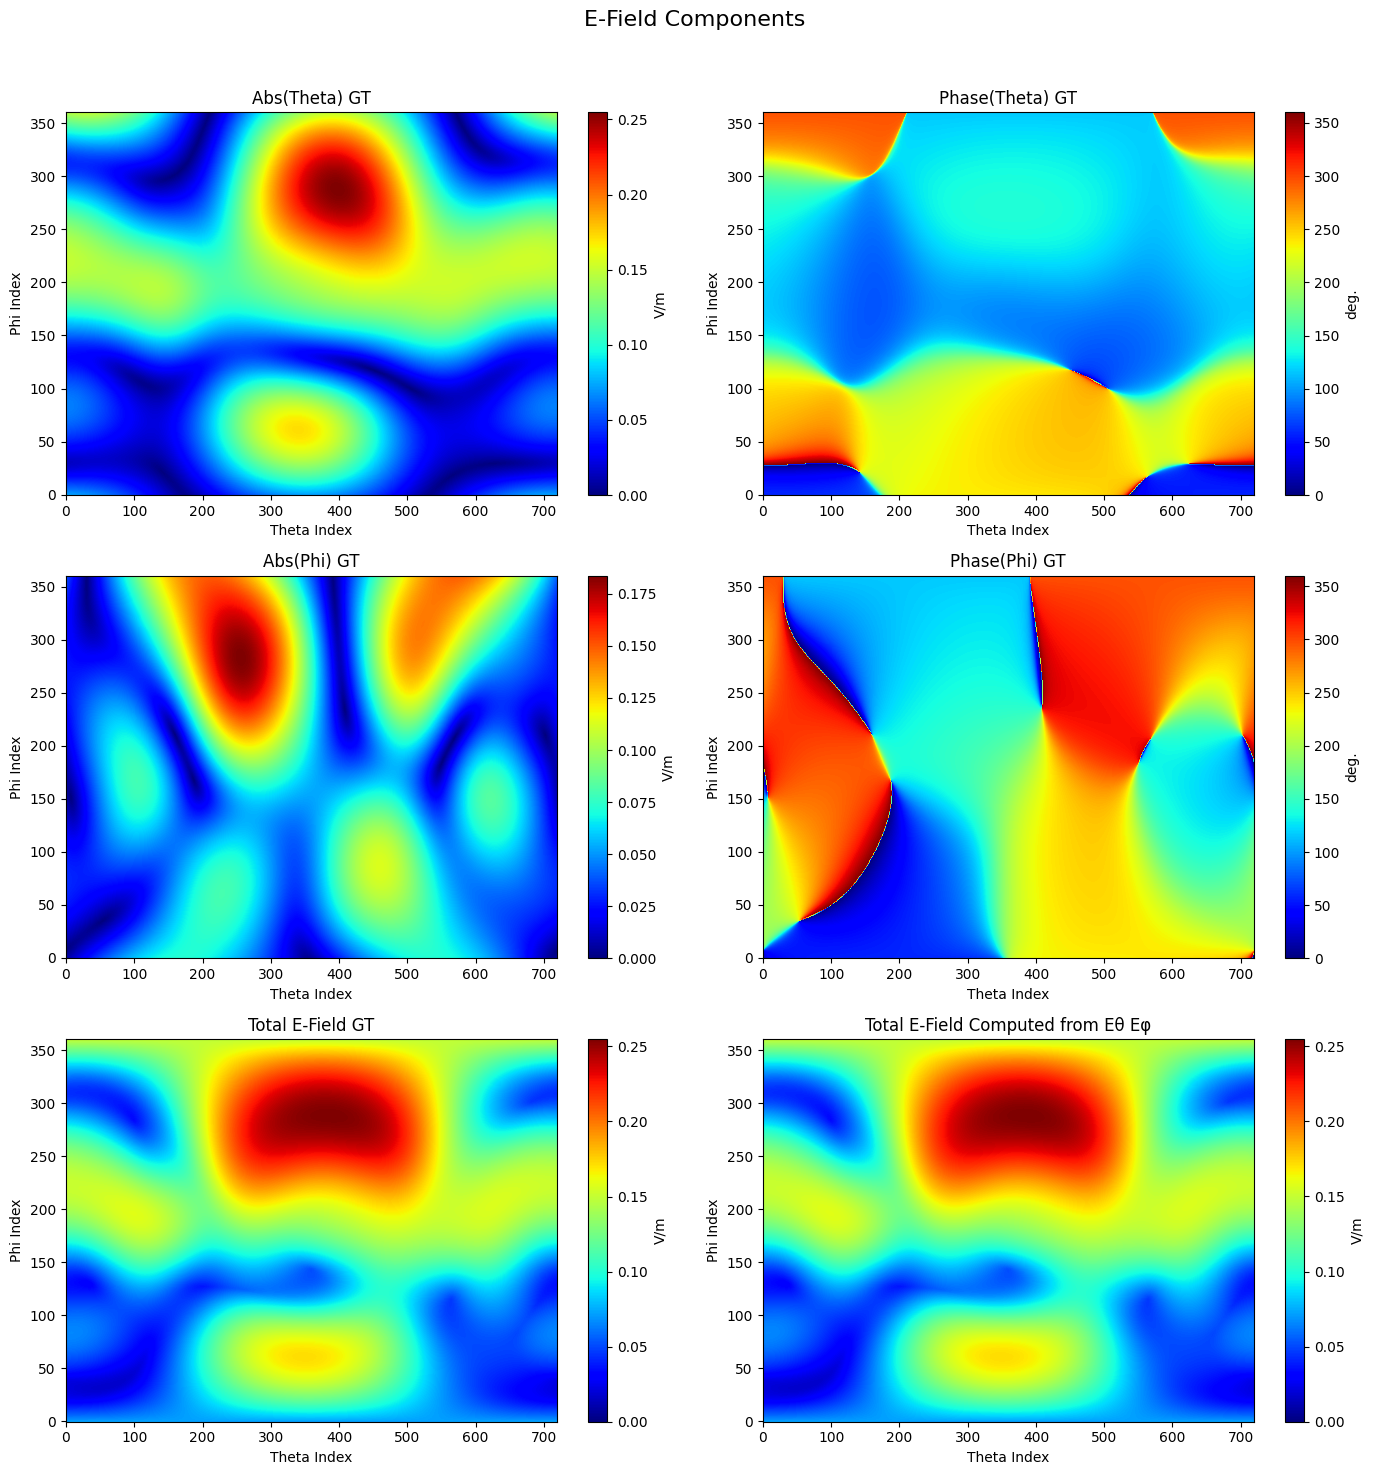

画图并保存到 b7fd_theta60phi30f0.39_AmPhase_fix.png 用时： 3.47s


In [ ]:
import torch
import os
import time
import matplotlib.pyplot as plt


def plot_E_field_Amphase(E_4D_tensor, savedir, logger=None, amp_cutmax=None, amp_cutmin=None):
    """
    可视化一个4D电场张量(H, W, 4)，生成两张图：
    1. 一张2x2的子图，分别展示 Abs(Theta), Phase(Theta), Abs(Phi), Phase(Phi)。
    2. 一张总电场绝对值的图。

    参数:
        E_4D_tensor (torch.Tensor): 输入的4D张量，形状为 (H, W, 4)。
        savedir_base (str): 保存图片的基础路径和文件名 (不含扩展名)。
                            例如: 'results/my_simulation'
        logger: 日志记录器对象 (可选)。
        amp_cutmax (float): 振幅图的颜色条最大值截断 (可选)。
        amp_cutmin (float): 振幅图的颜色条最小值截断 (默认为0)。
    """
    tic = time.time()
    if not isinstance(E_4D_tensor, torch.Tensor):
        E_4D_tensor = torch.tensor(E_4D_tensor)

    # 从第4个维度分离出四个分量 上面是6维的，下面是4维的
    if E_4D_tensor.shape[2] == 4: #振幅相位4维
        E_abs_theta = E_4D_tensor[:, :, 0]
        E_phase_theta = E_4D_tensor[:, :, 1]
        E_abs_phi = E_4D_tensor[:, :, 2]
        E_phase_phi = E_4D_tensor[:, :, 3]
    elif E_4D_tensor.shape[2] == 6: #振幅相位6维
        E_total_abs_real = E_4D_tensor[:, :, 0]
        E_abs_theta = E_4D_tensor[:, :, 1]
        E_phase_theta = E_4D_tensor[:, :, 2]
        E_abs_phi = E_4D_tensor[:, :, 3]
        E_phase_phi = E_4D_tensor[:, :, 4]

    # --- 替换这行 ---
    # E_total_abs_compute = torch.sqrt(E_abs_theta**2 + E_abs_phi**2)

    # --- 替换为以下代码块 ---
    # 核心修正：计算极化椭圆的长半轴作为总场强的精确可视化
    # 1. 计算两个分量之间的相位差（单位：弧度）
    delta_phi_rad = (E_phase_theta - E_phase_phi) * (torch.pi / 180.0)

    # 2. 为清晰起见，预计算振幅的平方
    E_abs_theta_sq = E_abs_theta**2
    E_abs_phi_sq = E_abs_phi**2

    # 3. 应用计算椭圆长半轴(A_maj)的精确公式: A_maj^2 = 0.5 * [|Eθ|²+|Eφ|² + sqrt( (|Eθ|²-|Eφ|²)² + 4|Eθ|²|Eφ|²cos²(Δφ) )]
    term1 = E_abs_theta_sq + E_abs_phi_sq
    term2_inner_sqrt = torch.sqrt((E_abs_theta_sq - E_abs_phi_sq)**2 + 4 * E_abs_theta_sq * E_abs_phi_sq * (torch.cos(delta_phi_rad))**2)

    E_total_abs_sq = 0.5 * (term1 + term2_inner_sqrt)

    # 4. 开方得到最终的总场强（椭圆长半轴）
    E_total_abs_compute = torch.sqrt(E_total_abs_sq)
    # --- 修正代码块结束 ---


    # --- 2. 绘制 3x2 四分量图 ---
    fig, axes = plt.subplots(3, 2, figsize=(14, 15))
    fig.suptitle('E-Field Components', fontsize=16)

    components_data = [
        (E_abs_theta, 'Abs(Theta) GT', 'V/m', amp_cutmin, amp_cutmax),
        (E_phase_theta, 'Phase(Theta) GT', 'deg.', None, None), # Phase通常不截断
        (E_abs_phi, 'Abs(Phi) GT', 'V/m', amp_cutmin, amp_cutmax),
        (E_phase_phi, 'Phase(Phi) GT', 'deg.', None, None),
        (E_total_abs_real, 'Total E-Field GT', 'V/m', amp_cutmin, amp_cutmax),
        (E_total_abs_compute, 'Total E-Field Computed from Eθ Eφ', 'V/m', amp_cutmin, amp_cutmax)
    ]
    
    # 将2x2的axes数组扁平化，方便遍历
    ax_flat = axes.flatten()

    for i, (data, title, label, vmin, vmax) in enumerate(components_data):
        ax = ax_flat[i]
        im = ax.imshow(data.detach().cpu().numpy(), cmap='jet', origin='lower', aspect='auto')
        ax.set_title(title)
        ax.set_xlabel("Theta Index")
        ax.set_ylabel("Phi Index")
        cbar = fig.colorbar(im, ax=ax, label=label)
        if vmin is not None and vmax is not None:
            im.set_clim(vmin, vmax)
    # 调整布局防止重叠
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(savedir)
    plt.show()
    plt.close(fig) # 关闭图形，释放内存

    if logger:
        logger.info(f'画图并保存到 {os.path.basename(savedir)} 用时：{time.time()-tic:.2f}s')
    else:
        print(f'画图并保存到 {os.path.basename(savedir)} 用时： {time.time()-tic:.2f}s')


file = '/mnt/truenas_jiangxiaotian/Edataset/complexE_mie_Amphase/b7fd_E_mie_AmPhase/b7fd_theta60phi30f0.39.pt'
e4 = torch.load(file)
plot_E_field_Amphase(e4, f'{file.split("/")[-1][:-3]}_AmPhase_fix.png')

# 实部虚部6图

--- 开始绘制默认图像 ---


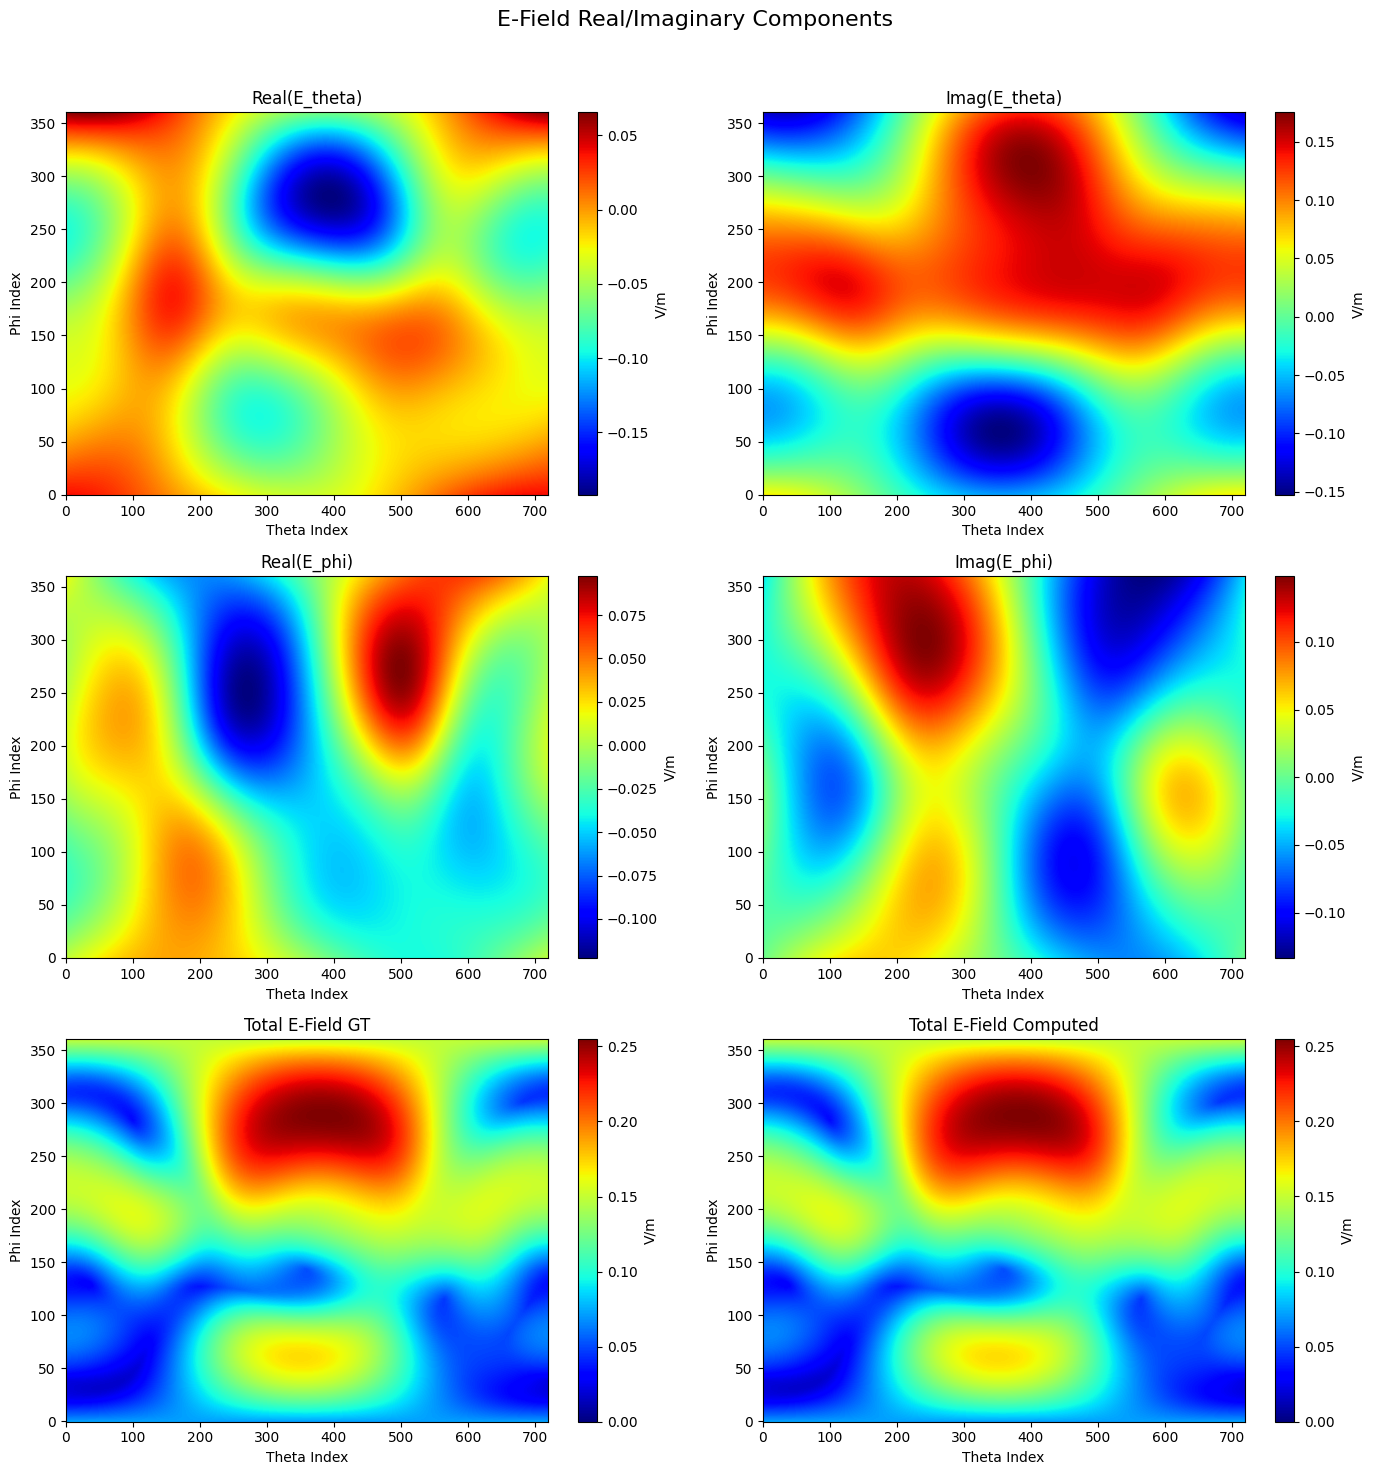

画图并保存到 b7fd_theta60phi30f0.39_RI_default.png 用时： 3.13s
--------------------------------------------------

--- 开始绘制新功能图像（所有子图同步Colorbar） ---
启用全局颜色刻度: Min=-0.1921, Max=0.2549


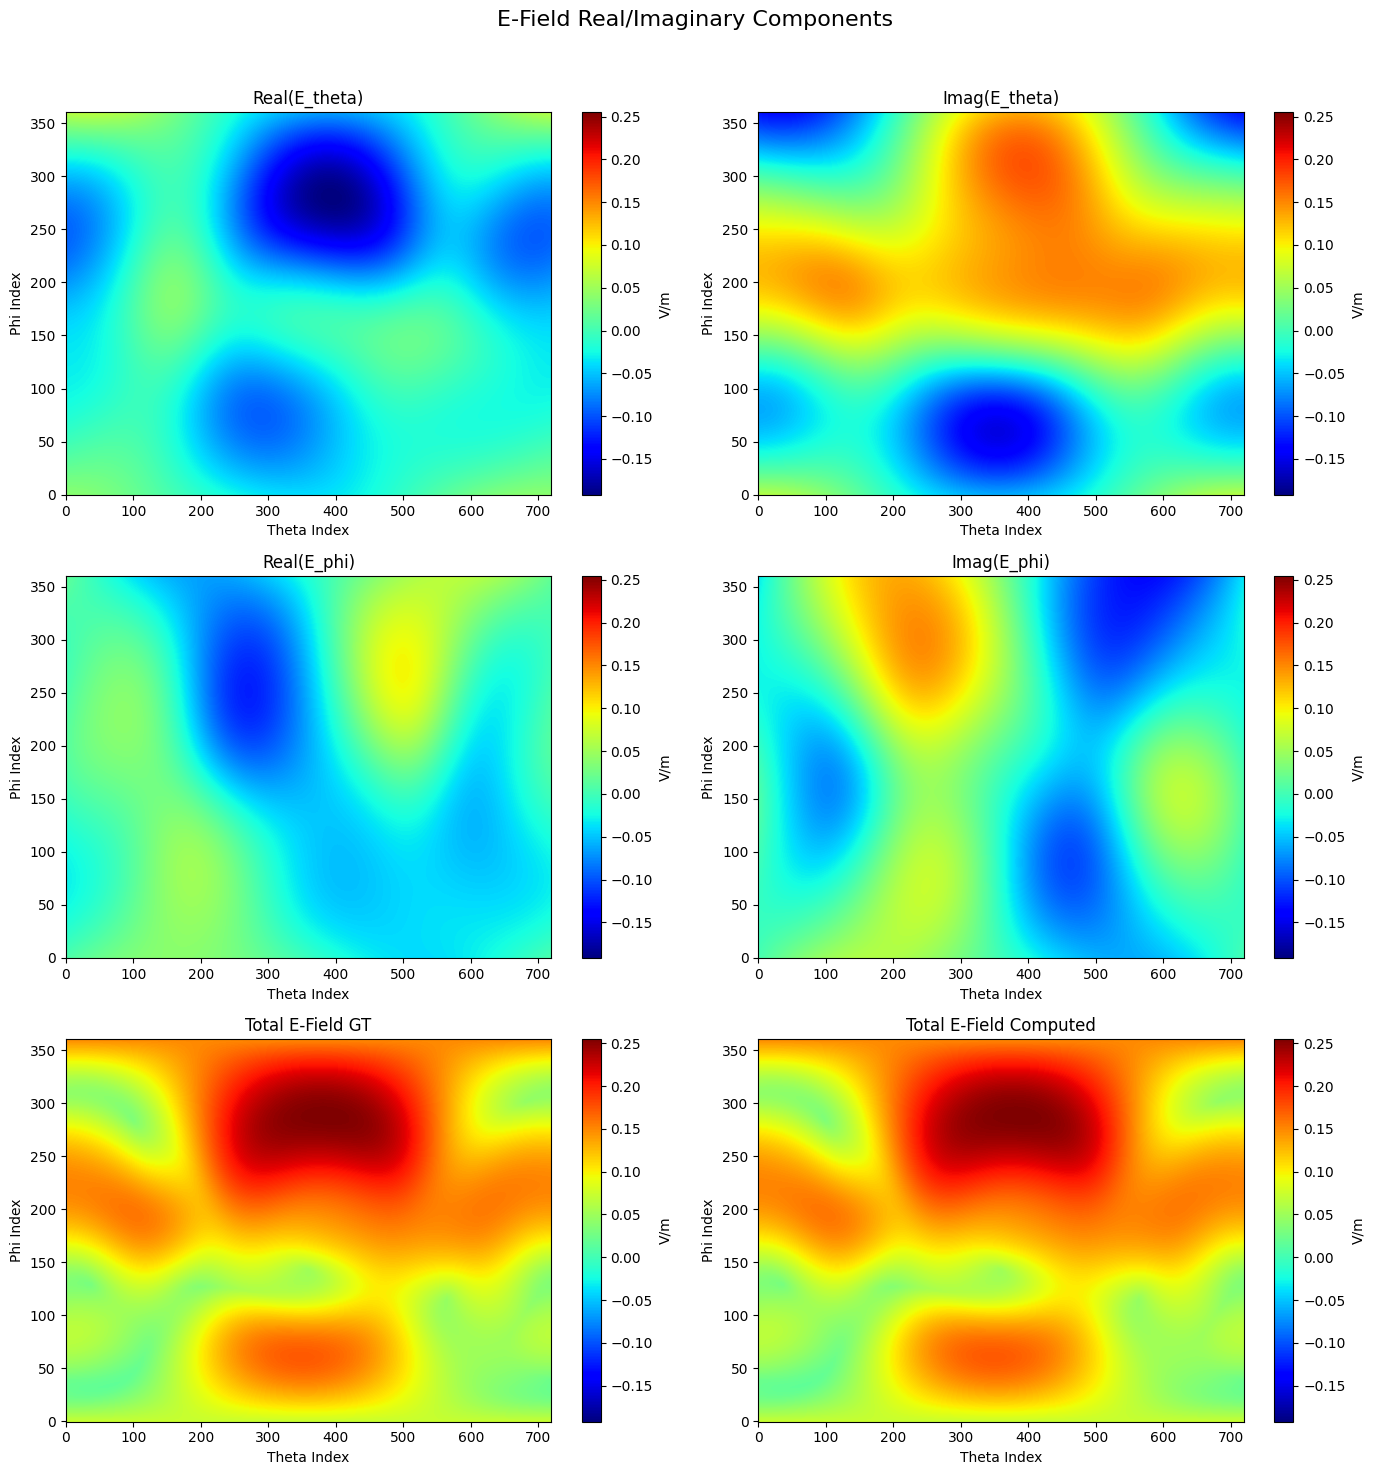

画图并保存到 b7fd_theta60phi30f0.39_RI_synced.png 用时： 3.21s
--------------------------------------------------


In [8]:
import torch
import os
import time
import matplotlib.pyplot as plt
import re

def plot_E_field_RealImage(ri_tensor_path, savedir, use_same_max=False, logger=None):
    """
    可视化Real-Image (实部-虚部) 4D张量，并与真值进行对比。

    Args:
        ri_tensor_path (str): 包含实部虚部信息的 .pt 文件路径。
        savedir (str): 图像保存的完整路径。
        use_same_max (bool): 如果为True，所有子图使用统一的颜色刻度范围。
        logger: 可选的日志记录器。
    """
    tic = time.time()
    
    # --- 1. 加载数据并分离实部虚部组件 ---
    try:
        ri_tensor = torch.load(ri_tensor_path, map_location=torch.device('cpu'))
    except FileNotFoundError:
        print(f"错误: Real-Image 文件未找到: {ri_tensor_path}")
        return

    E_theta_real = ri_tensor[:, :, 0]
    E_theta_imagine = ri_tensor[:, :, 1]
    E_phi_real = ri_tensor[:, :, 2]
    E_phi_imagine = ri_tensor[:, :, 3]

    # --- 2. 动态加载总场强的真值 (Ground Truth) ---
    amphase_path = ri_tensor_path.replace('_RealImage/', '_Amphase/').replace('_RI.pt', '.pt')    
    try:
        amphase_tensor_gt = torch.load(amphase_path, map_location=torch.device('cpu'))
        E_total_abs_gt = amphase_tensor_gt[:, :, 0]
    except FileNotFoundError:
        print(f"警告: 未找到对应的真值文件: {amphase_path}。总场强GT将无法绘制。")
        E_total_abs_gt = torch.zeros_like(E_theta_real)
    # E_total_abs_gt = torch.load('/mnt/truenas_jiangxiaotian/Edataset/complexE_mie_Amphase/b7fd_E_mie_train/b7fd_theta60phi30f0.39.pt')[:, :, 0] # 直接加载总场强的实部

    # --- 3. 从实部虚部正确计算总场强（极化椭圆长半轴）---
    E_abs_theta = torch.sqrt(E_theta_real**2 + E_theta_imagine**2)
    E_abs_phi = torch.sqrt(E_phi_real**2 + E_phi_imagine**2)
    E_phase_theta_rad = torch.atan2(E_theta_imagine, E_theta_real)
    E_phase_phi_rad = torch.atan2(E_phi_imagine, E_phi_real)
    delta_phi_rad = E_phase_theta_rad - E_phase_phi_rad
    E_abs_theta_sq = E_abs_theta**2
    E_abs_phi_sq = E_abs_phi**2
    term1 = E_abs_theta_sq + E_abs_phi_sq
    term2_inner_sqrt = torch.sqrt((E_abs_theta_sq - E_abs_phi_sq)**2 + 4 * E_abs_theta_sq * E_abs_phi_sq * (torch.cos(delta_phi_rad))**2)
    E_total_abs_sq = 0.5 * (term1 + term2_inner_sqrt)
    E_total_abs_compute = torch.sqrt(E_total_abs_sq)

    # --- 4. 准备绘图数据 ---
    fig, axes = plt.subplots(3, 2, figsize=(14, 15))
    fig.suptitle('E-Field Real/Imaginary Components', fontsize=16)

    components_data = [
        (E_theta_real, 'Real(E_theta)', 'V/m'),
        (E_theta_imagine, 'Imag(E_theta)', 'V/m'),
        (E_phi_real, 'Real(E_phi)', 'V/m'),
        (E_phi_imagine, 'Imag(E_phi)', 'V/m'),
        (E_total_abs_gt, 'Total E-Field GT', 'V/m'),
        (E_total_abs_compute, 'Total E-Field Computed', 'V/m')
    ]
    
    # --- 5. 新增功能：计算全局颜色范围 ---
    global_min, global_max = None, None
    if use_same_max:
        # 将所有6个张量的数据堆叠起来，高效地计算全局最大最小值
        all_tensors = [d[0] for d in components_data]
        stacked_data = torch.stack(all_tensors)
        global_min = stacked_data.min().item()
        global_max = stacked_data.max().item()
        print(f"启用全局颜色刻度: Min={global_min:.4f}, Max={global_max:.4f}")

    # --- 6. 绘制 3x2 六子图 ---
    ax_flat = axes.flatten()

    for i, (data, title, label) in enumerate(components_data):
        ax = ax_flat[i]
        
        # 根据 use_same_max 参数决定 vmin 和 vmax
        if use_same_max:
            vmin, vmax = global_min, global_max
        else:
            # 默认行为：只统一最后两个总场图的颜色范围 也不要了
            vmin, vmax = None, None
            # if 'Total E-Field' in title:
            #     vmin = min(E_total_abs_gt.min(), E_total_abs_compute.min()).item()
            #     vmax = max(E_total_abs_gt.max(), E_total_abs_compute.max()).item()

        im = ax.imshow(data.detach().cpu().numpy(), cmap='jet', origin='lower', aspect='auto', vmin=vmin, vmax=vmax)
        ax.set_title(title)
        ax.set_xlabel("Theta Index")
        ax.set_ylabel("Phi Index")
        fig.colorbar(im, ax=ax, label=label)

    # 调整布局防止重叠
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # 保存和显示图像
    plt.savefig(savedir)
    plt.show()
    plt.close(fig)

    if logger:
        logger.info(f'画图并保存到 {os.path.basename(savedir)} 用时：{time.time()-tic:.2f}s')
    else:
        print(f'画图并保存到 {os.path.basename(savedir)} 用时： {time.time()-tic:.2f}s')

# --- 主程序入口 ---
if __name__ == '__main__':
    # 定义包含 Real-Image 数据的 .pt 文件路径
    ri_file_path = '/mnt/truenas_jiangxiaotian/Edataset/complexE_mie_RealImage/b7fd_E_mie_train/b7fd_theta60phi30f0.39_RI.pt'
    
    # --- 演示1: 默认行为（只统一最后两个图的colorbar） ---
    print("--- 开始绘制默认图像 ---")
    output_image_path_default = f'{os.path.basename(ri_file_path).replace(".pt", "_default.png")}'
    plot_E_field_RealImage(ri_file_path, output_image_path_default, use_same_max=False)
    print("-" * 50)
    
    # --- 演示2: 新增功能（所有图使用统一的colorbar） ---
    print("\n--- 开始绘制新功能图像（所有子图同步Colorbar） ---")
    output_image_path_synced = f'{os.path.basename(ri_file_path).replace(".pt", "_synced.png")}'
    plot_E_field_RealImage(ri_file_path, output_image_path_synced, use_same_max=True)
    print("-" * 50)

# 实部虚部5图

--- 开始绘制默认图像 ---


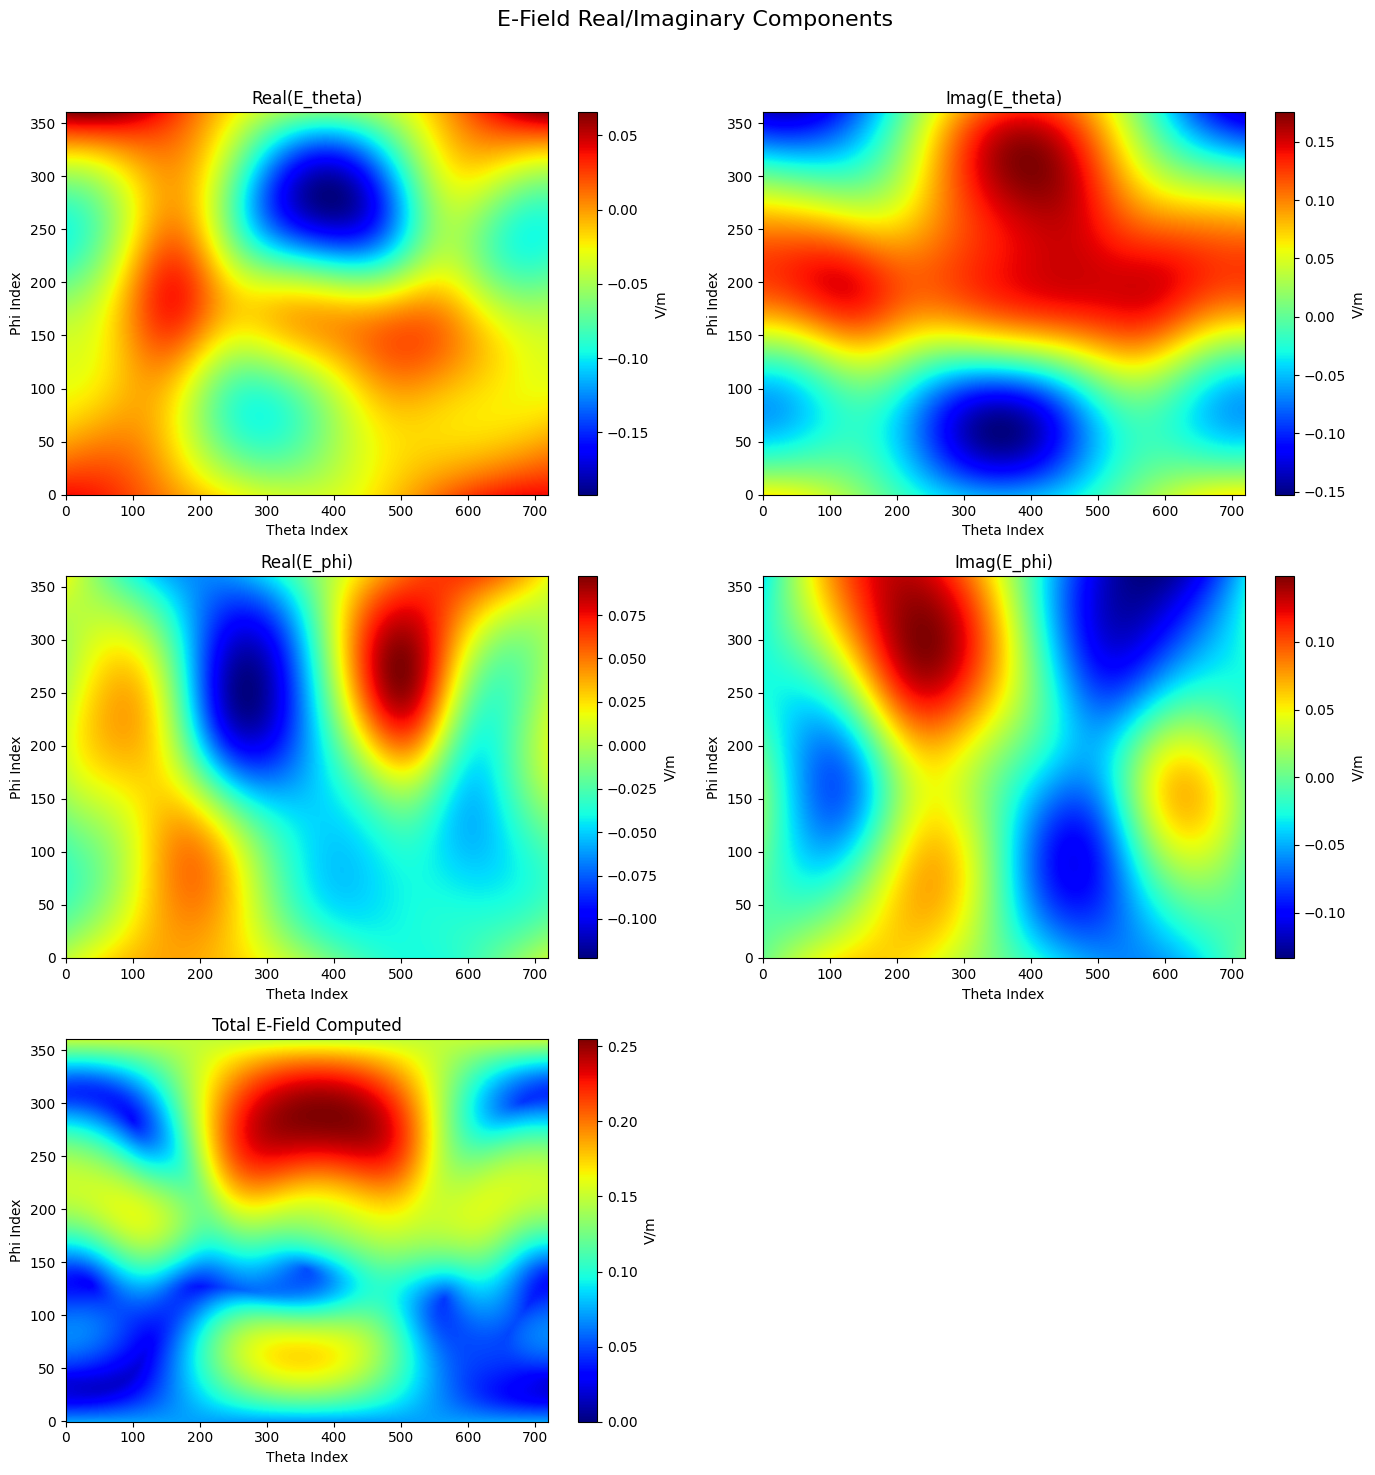

画图并保存到 b7fd_theta60phi30f0.39_RI_default.png 用时： 2.66s
--------------------------------------------------

--- 开始绘制新功能图像（所有子图同步Colorbar） ---
启用全局颜色刻度: Min=-0.1921, Max=0.2549


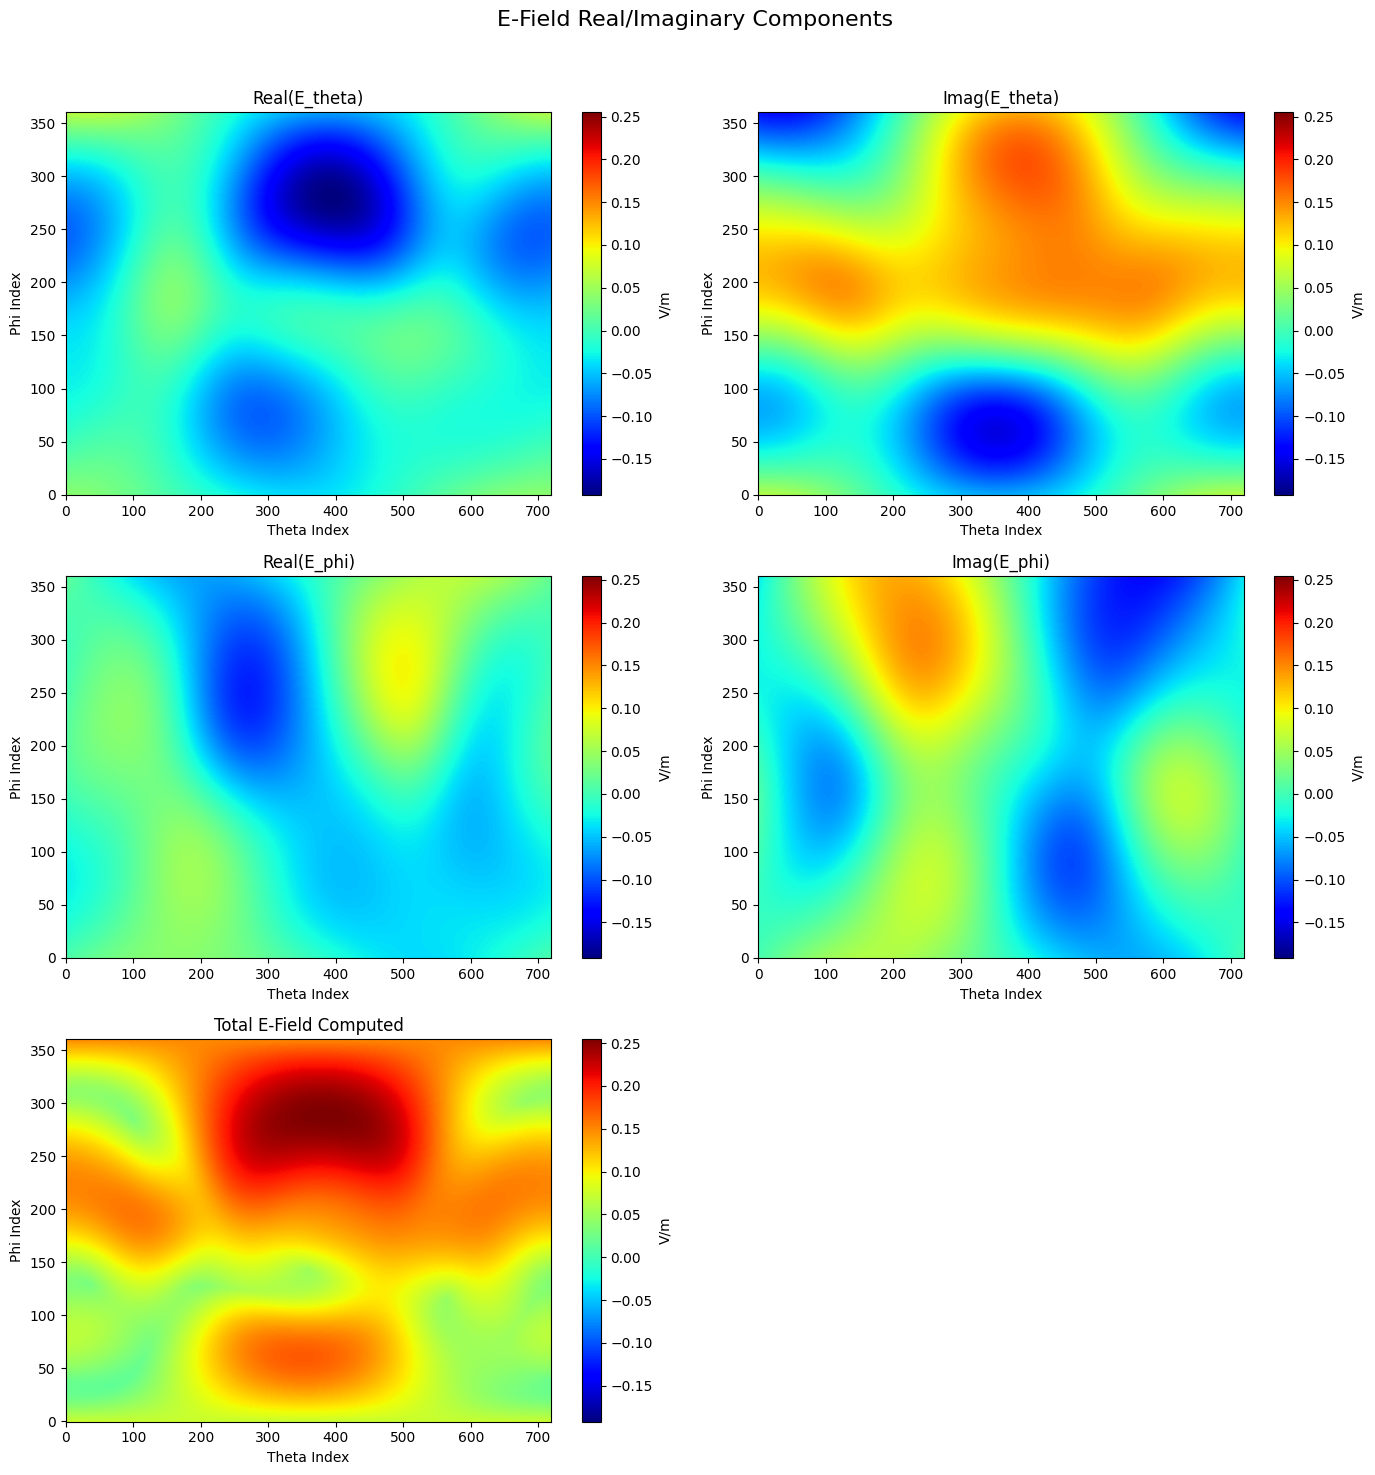

画图并保存到 b7fd_theta60phi30f0.39_RI_synced.png 用时： 2.79s
--------------------------------------------------


In [11]:
import torch
import os
import time
import matplotlib.pyplot as plt
import re

def plot_E_field_RealImage(ri_tensor_path, savedir, use_same_max=False, logger=None):
    """
    可视化Real-Image (实部-虚部) 4D张量，并算出总场同步绘制。

    Args:
        ri_tensor_path (str): 包含实部虚部信息的 .pt 文件路径。
        savedir (str): 图像保存的完整路径。
        use_same_max (bool): 如果为True，所有子图使用统一的颜色刻度范围。
        logger: 可选的日志记录器。
    """
    tic = time.time()
    
    # --- 1. 加载数据并分离实部虚部组件 ---
    try:
        ri_tensor = torch.load(ri_tensor_path, map_location=torch.device('cpu'))
    except FileNotFoundError:
        print(f"错误: Real-Image 文件未找到: {ri_tensor_path}")
        return

    E_theta_real = ri_tensor[:, :, 0]
    E_theta_imagine = ri_tensor[:, :, 1]
    E_phi_real = ri_tensor[:, :, 2]
    E_phi_imagine = ri_tensor[:, :, 3]

    # # --- 2. 动态加载总场强的真值 (Ground Truth) ---
    # amphase_path = ri_tensor_path.replace('_RealImage/', '_Amphase/').replace('_RI.pt', '.pt')    
    # try:
    #     amphase_tensor_gt = torch.load(amphase_path, map_location=torch.device('cpu'))
    #     E_total_abs_gt = amphase_tensor_gt[:, :, 0]
    # except FileNotFoundError:
    #     print(f"警告: 未找到对应的真值文件: {amphase_path}。总场强GT将无法绘制。")
    #     E_total_abs_gt = torch.zeros_like(E_theta_real)
    # # E_total_abs_gt = torch.load('/mnt/truenas_jiangxiaotian/Edataset/complexE_mie_Amphase/b7fd_E_mie_train/b7fd_theta60phi30f0.39.pt')[:, :, 0] # 直接加载总场强的实部

    # --- 3. 从实部虚部正确计算总场强（极化椭圆长半轴）---
    E_abs_theta = torch.sqrt(E_theta_real**2 + E_theta_imagine**2)
    E_abs_phi = torch.sqrt(E_phi_real**2 + E_phi_imagine**2)
    E_phase_theta_rad = torch.atan2(E_theta_imagine, E_theta_real)
    E_phase_phi_rad = torch.atan2(E_phi_imagine, E_phi_real)
    delta_phi_rad = E_phase_theta_rad - E_phase_phi_rad
    E_abs_theta_sq = E_abs_theta**2
    E_abs_phi_sq = E_abs_phi**2
    term1 = E_abs_theta_sq + E_abs_phi_sq
    term2_inner_sqrt = torch.sqrt((E_abs_theta_sq - E_abs_phi_sq)**2 + 4 * E_abs_theta_sq * E_abs_phi_sq * (torch.cos(delta_phi_rad))**2)
    E_total_abs_sq = 0.5 * (term1 + term2_inner_sqrt)
    E_total_abs_compute = torch.sqrt(E_total_abs_sq)

    # --- 4. 准备绘图数据 ---
    fig, axes = plt.subplots(3, 2, figsize=(14, 15))
    fig.suptitle('E-Field Real/Imaginary Components', fontsize=16)

    components_data = [
        (E_theta_real, 'Real(E_theta)', 'V/m'),
        (E_theta_imagine, 'Imag(E_theta)', 'V/m'),
        (E_phi_real, 'Real(E_phi)', 'V/m'),
        (E_phi_imagine, 'Imag(E_phi)', 'V/m'),
        # (E_total_abs_gt, 'Total E-Field GT', 'V/m'),
        (E_total_abs_compute, 'Total E-Field Computed', 'V/m')
    ]
    
    # --- 5. 新增功能：计算全局颜色范围 ---
    global_min, global_max = None, None
    if use_same_max:
        # 将所有6个张量的数据堆叠起来，高效地计算全局最大最小值
        all_tensors = [d[0] for d in components_data]
        stacked_data = torch.stack(all_tensors)
        global_min = stacked_data.min().item()
        global_max = stacked_data.max().item()
        print(f"启用全局颜色刻度: Min={global_min:.4f}, Max={global_max:.4f}")

    # --- 6. 绘制 3x2 六子图 ---
    ax_flat = axes.flatten()

    for i, (data, title, label) in enumerate(components_data):
        ax = ax_flat[i]
        
        # 根据 use_same_max 参数决定 vmin 和 vmax
        if use_same_max:
            vmin, vmax = global_min, global_max
        else:
            # 默认行为：只统一最后两个总场图的颜色范围 也不要了
            vmin, vmax = None, None
            # if 'Total E-Field' in title:
            #     vmin = min(E_total_abs_gt.min(), E_total_abs_compute.min()).item()
            #     vmax = max(E_total_abs_gt.max(), E_total_abs_compute.max()).item()

        im = ax.imshow(data.detach().cpu().numpy(), cmap='jet', origin='lower', aspect='auto', vmin=vmin, vmax=vmax)
        ax.set_title(title)
        ax.set_xlabel("Theta Index")
        ax.set_ylabel("Phi Index")
        fig.colorbar(im, ax=ax, label=label)

    if len(components_data)==5:
        axes[2, 1].axis('off')

    # 调整布局防止重叠
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # 保存和显示图像
    plt.savefig(savedir)
    plt.show()
    plt.close(fig)

    if logger:
        logger.info(f'画图并保存到 {os.path.basename(savedir)} 用时：{time.time()-tic:.2f}s')
    else:
        print(f'画图并保存到 {os.path.basename(savedir)} 用时： {time.time()-tic:.2f}s')

# --- 主程序入口 ---
if __name__ == '__main__':
    # 定义包含 Real-Image 数据的 .pt 文件路径
    ri_file_path = '/mnt/truenas_jiangxiaotian/Edataset/complexE_mie_RealImage/b7fd_E_mie_train/b7fd_theta60phi30f0.39_RI.pt'
    
    # --- 演示1: 默认行为（只统一最后两个图的colorbar） ---
    print("--- 开始绘制默认图像 ---")
    output_image_path_default = f'{os.path.basename(ri_file_path).replace(".pt", "_default.png")}'
    plot_E_field_RealImage(ri_file_path, output_image_path_default, use_same_max=False)
    print("-" * 50)
    
    # --- 演示2: 新增功能（所有图使用统一的colorbar） ---
    print("\n--- 开始绘制新功能图像（所有子图同步Colorbar） ---")
    output_image_path_synced = f'{os.path.basename(ri_file_path).replace(".pt", "_synced.png")}'
    plot_E_field_RealImage(ri_file_path, output_image_path_synced, use_same_max=True)
    print("-" * 50)

实部虚部6图验验货

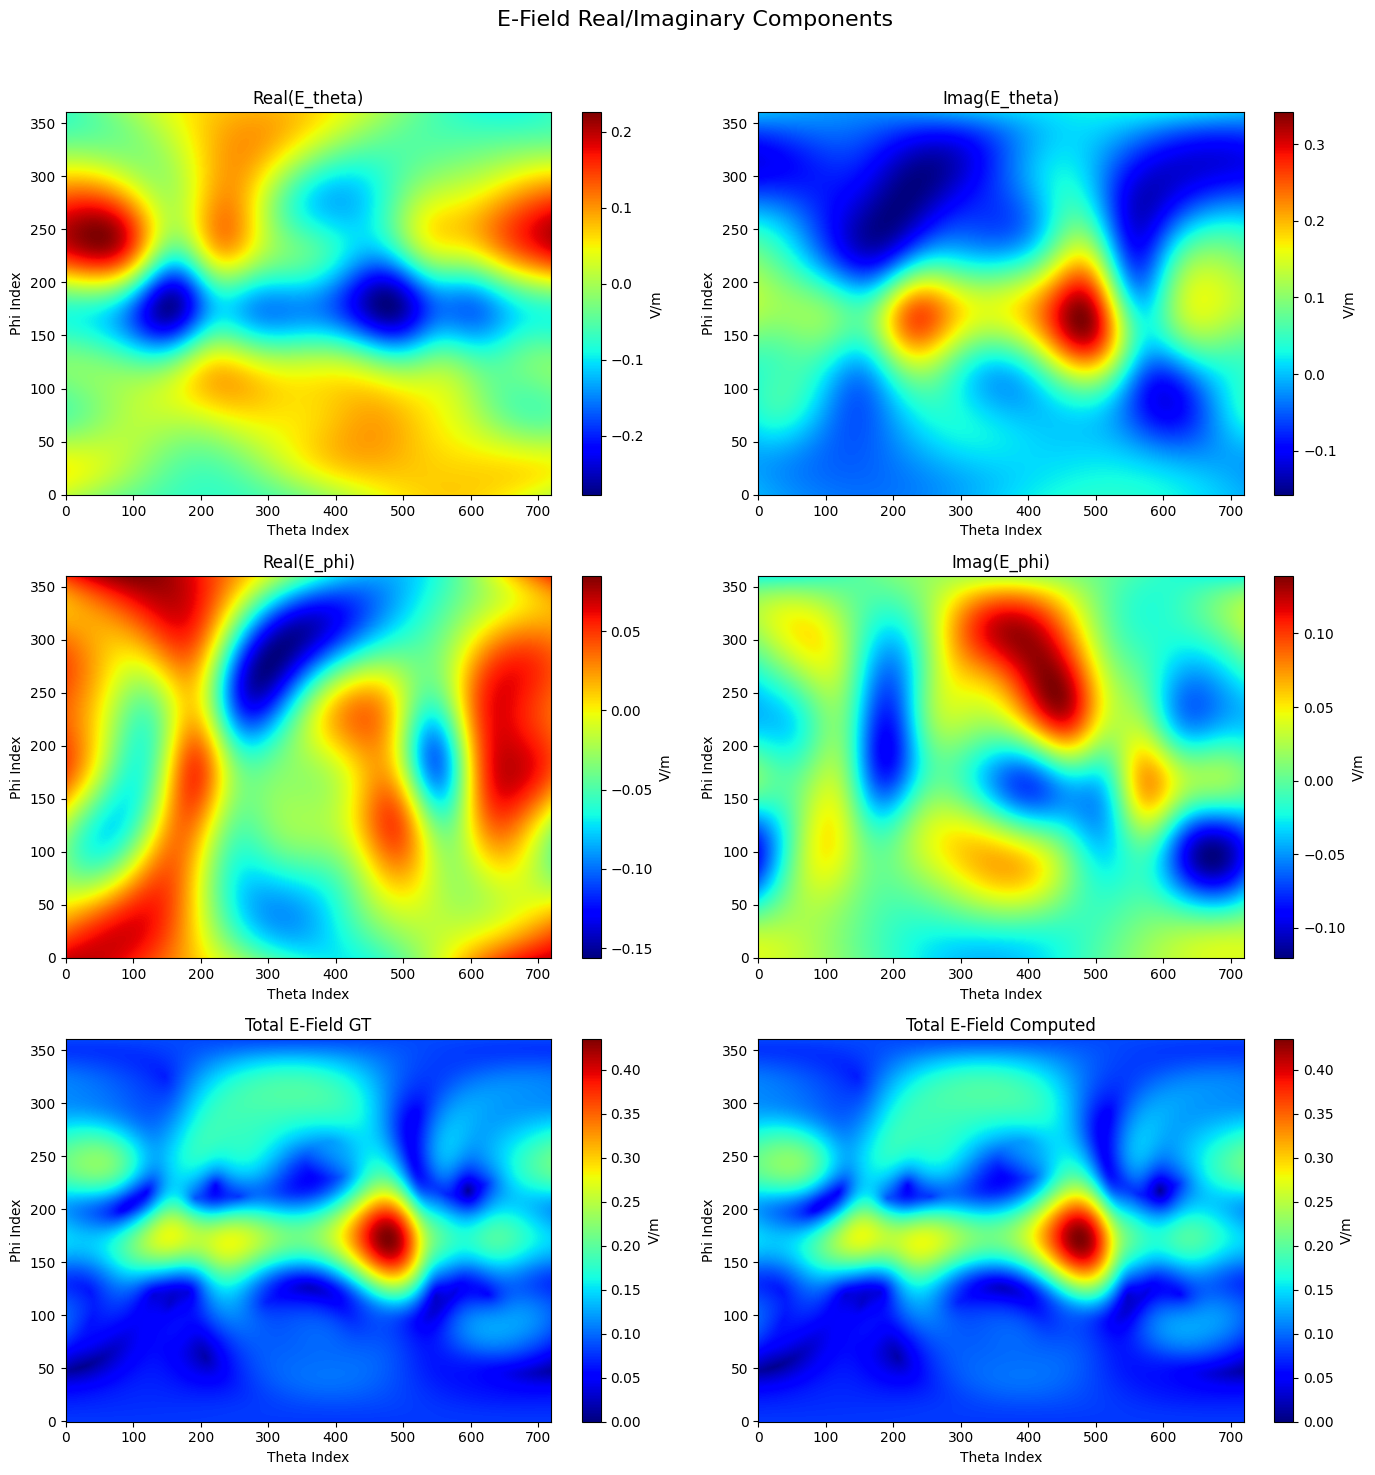

画图并保存到 b7fd_theta90phi60f0.7_RI.png 用时： 3.23s


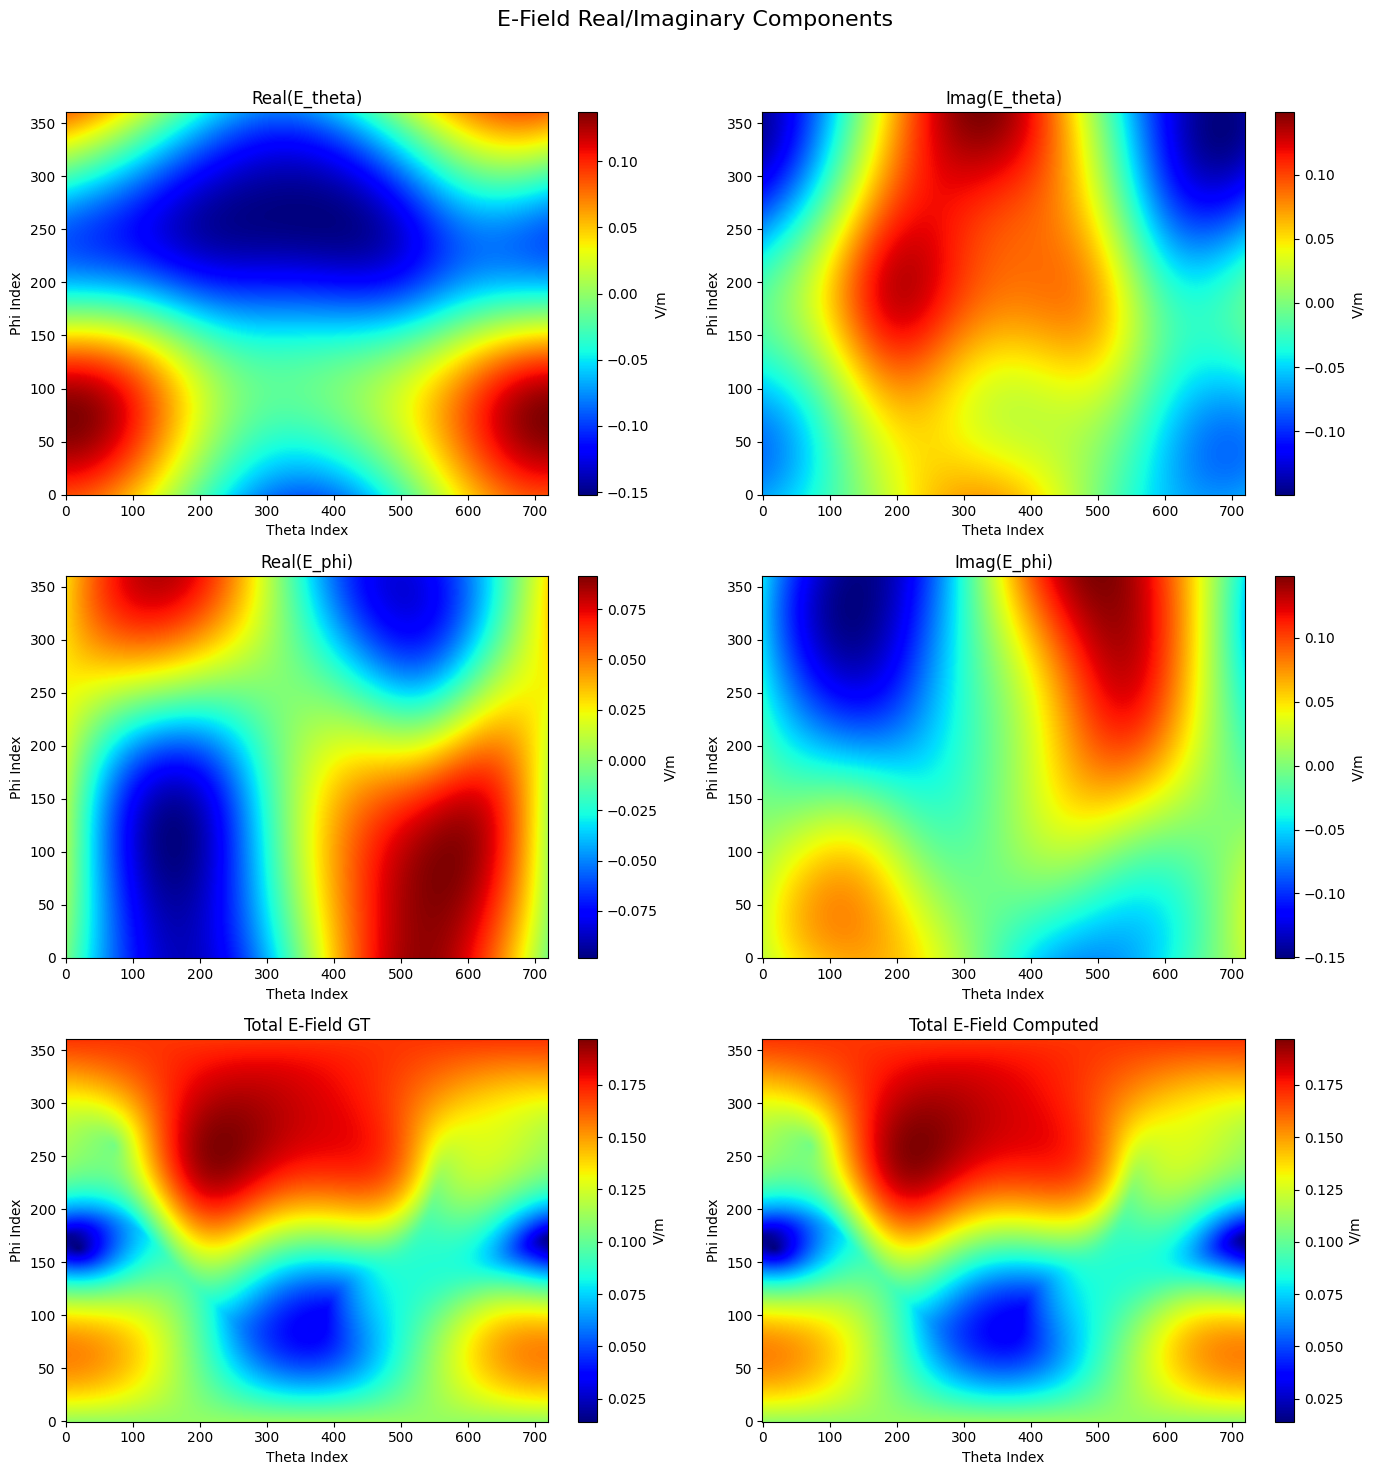

画图并保存到 b7fd_theta150phi150f0.245_RI.png 用时： 2.86s


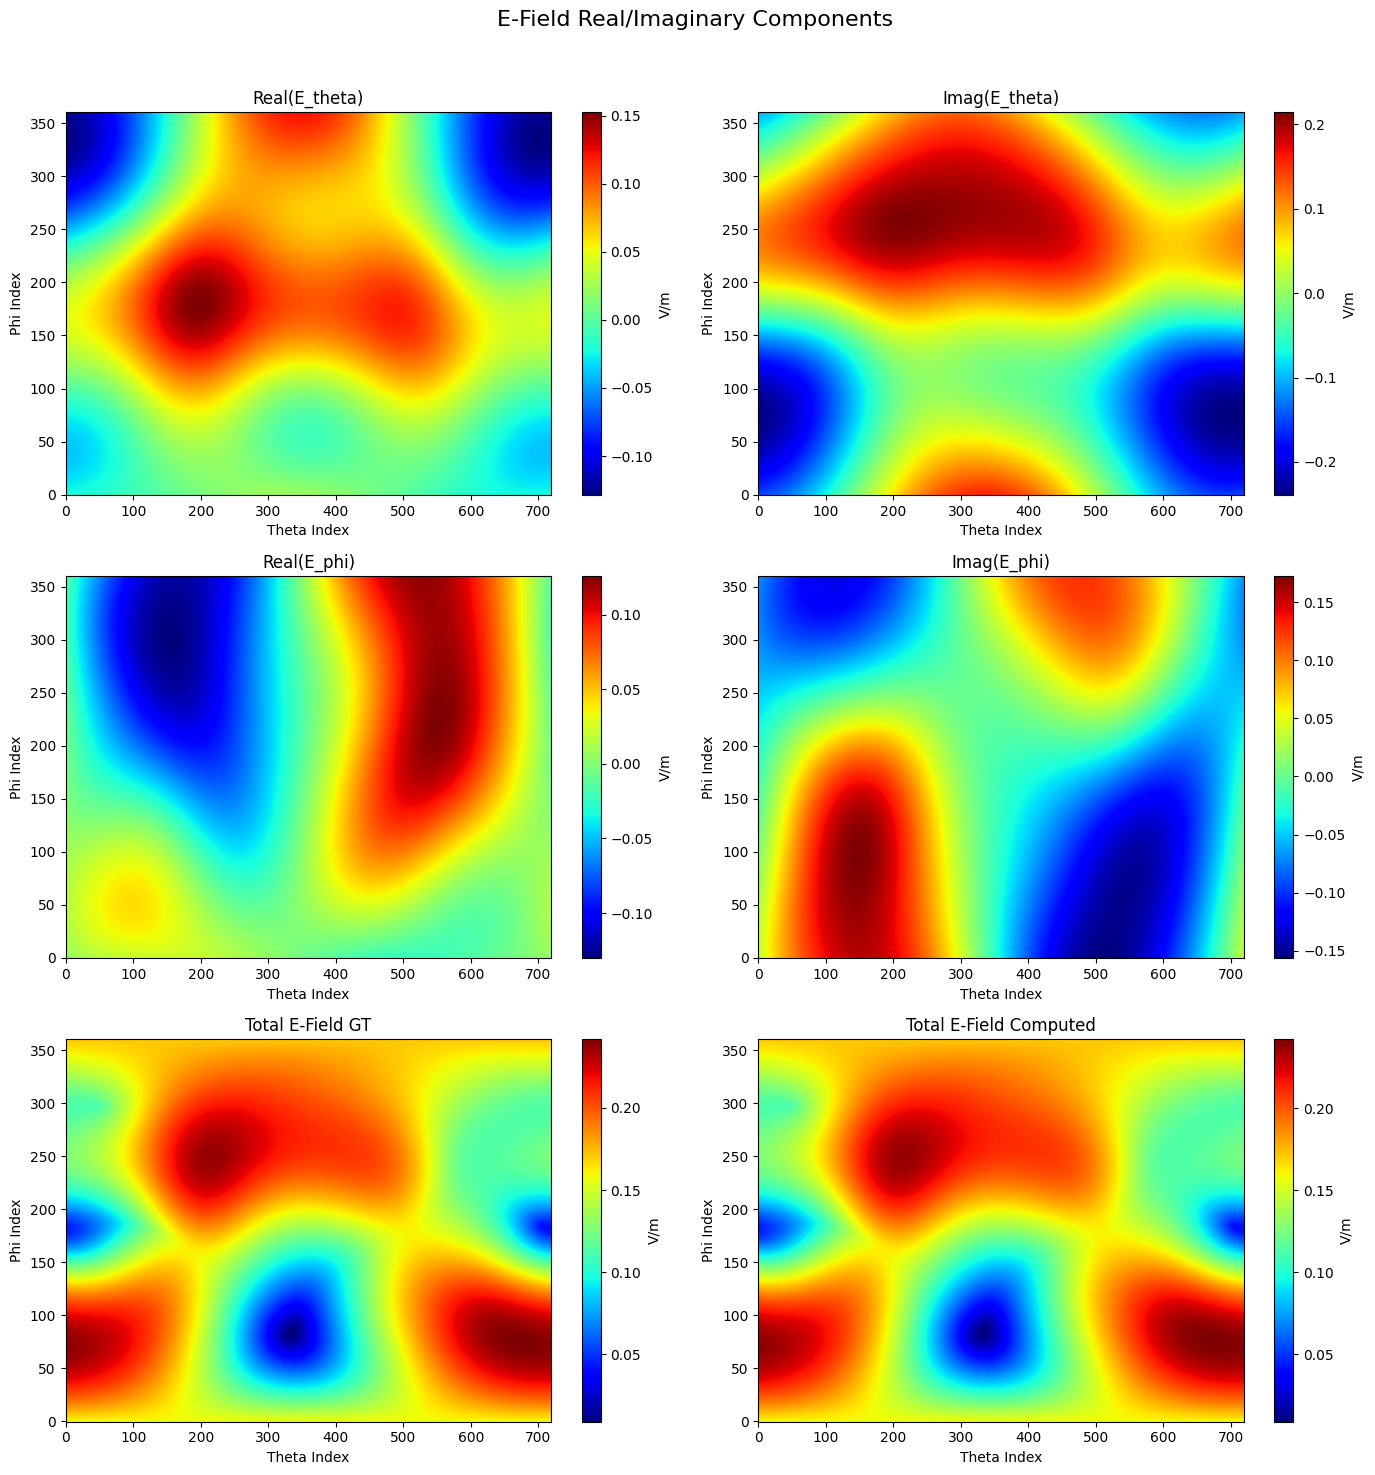

画图并保存到 b7fd_theta150phi150f0.295_RI.png 用时： 2.95s


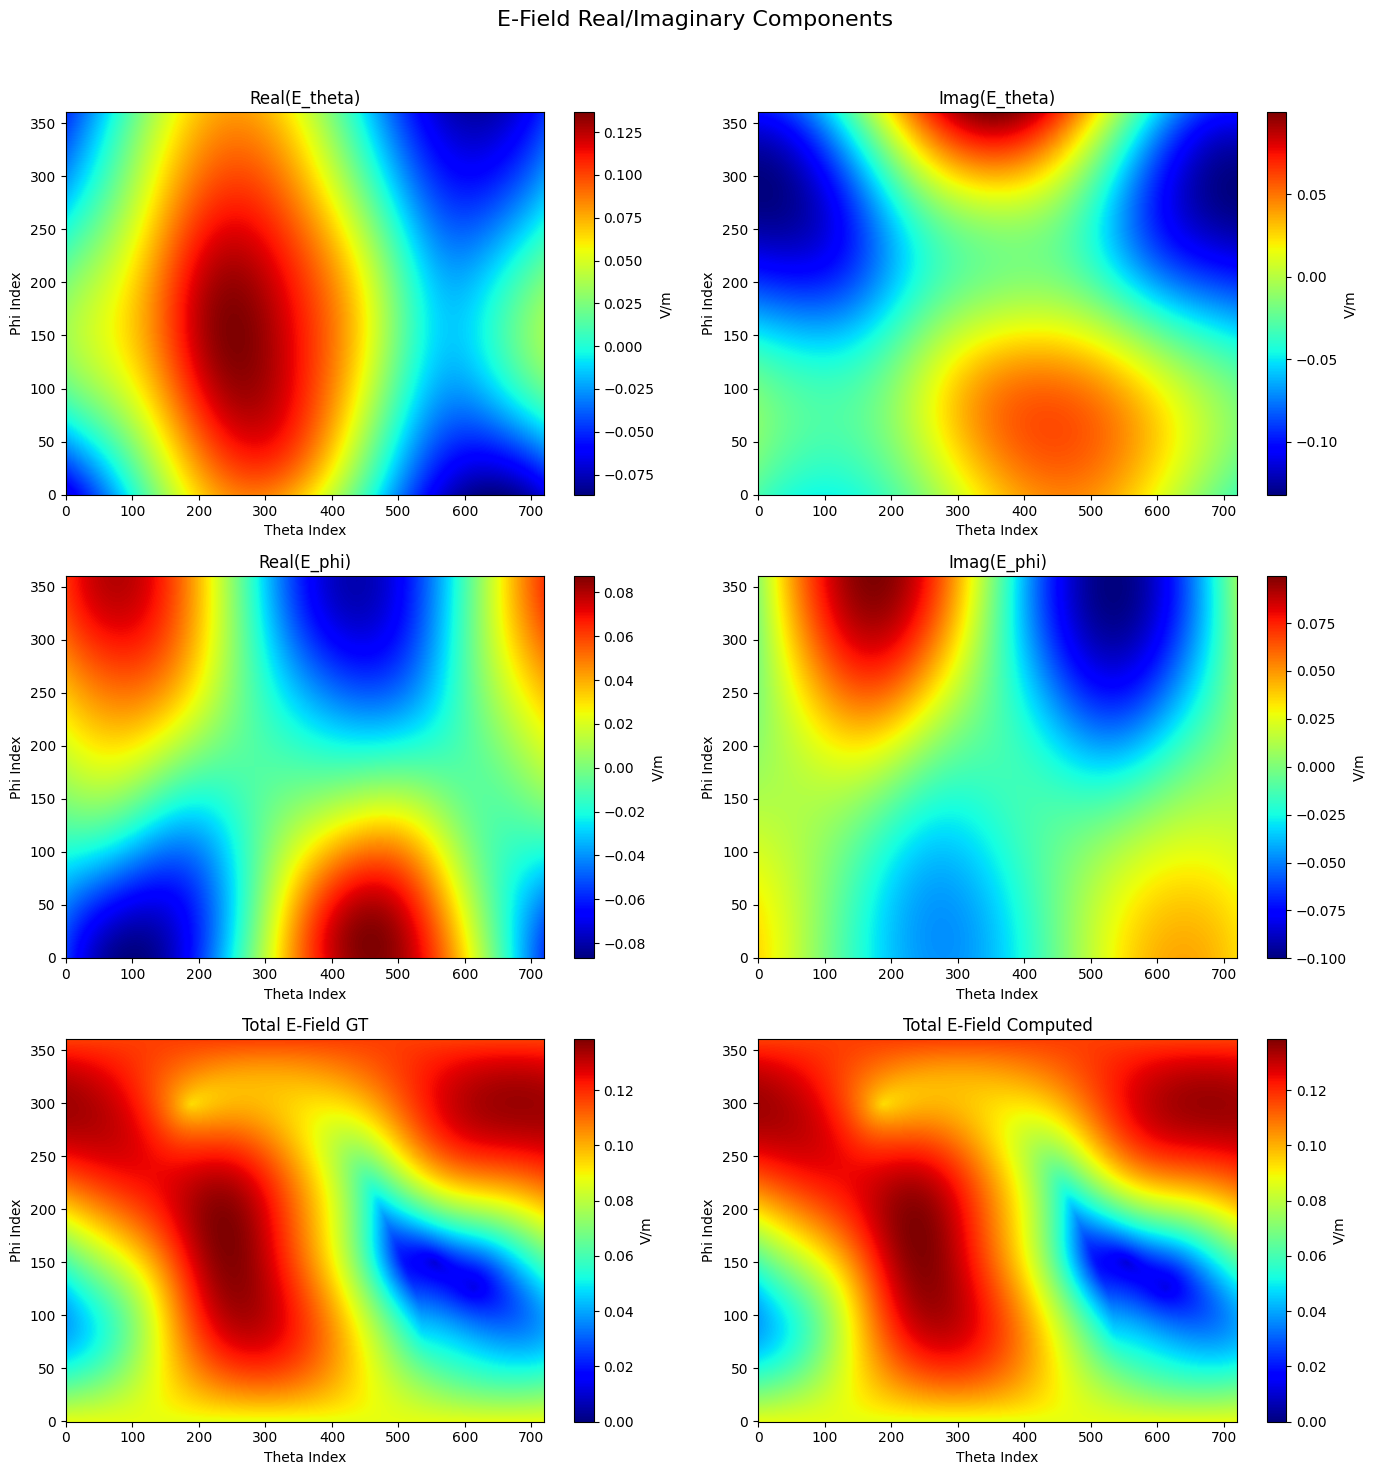

画图并保存到 b7fd_theta150phi330f0.175_RI.png 用时： 2.91s


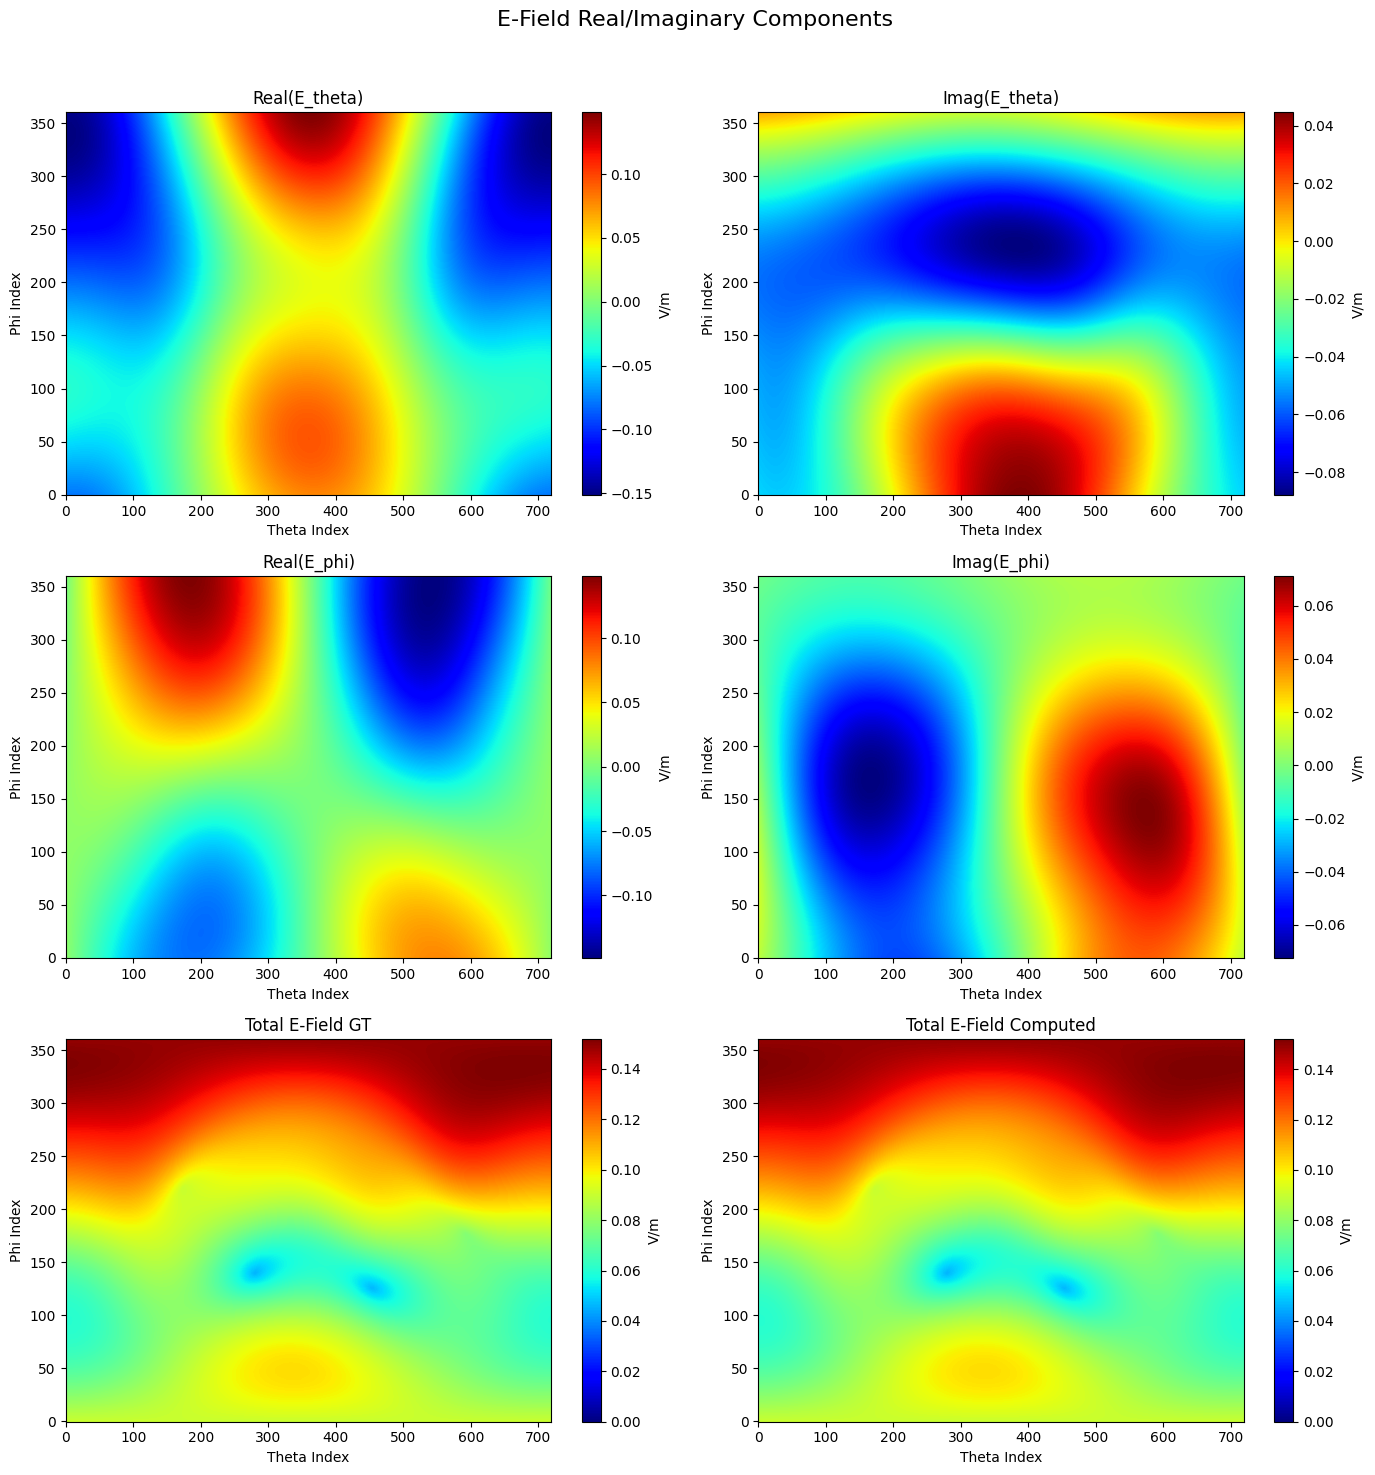

画图并保存到 b7fd_theta150phi0f0.205_RI.png 用时： 3.01s


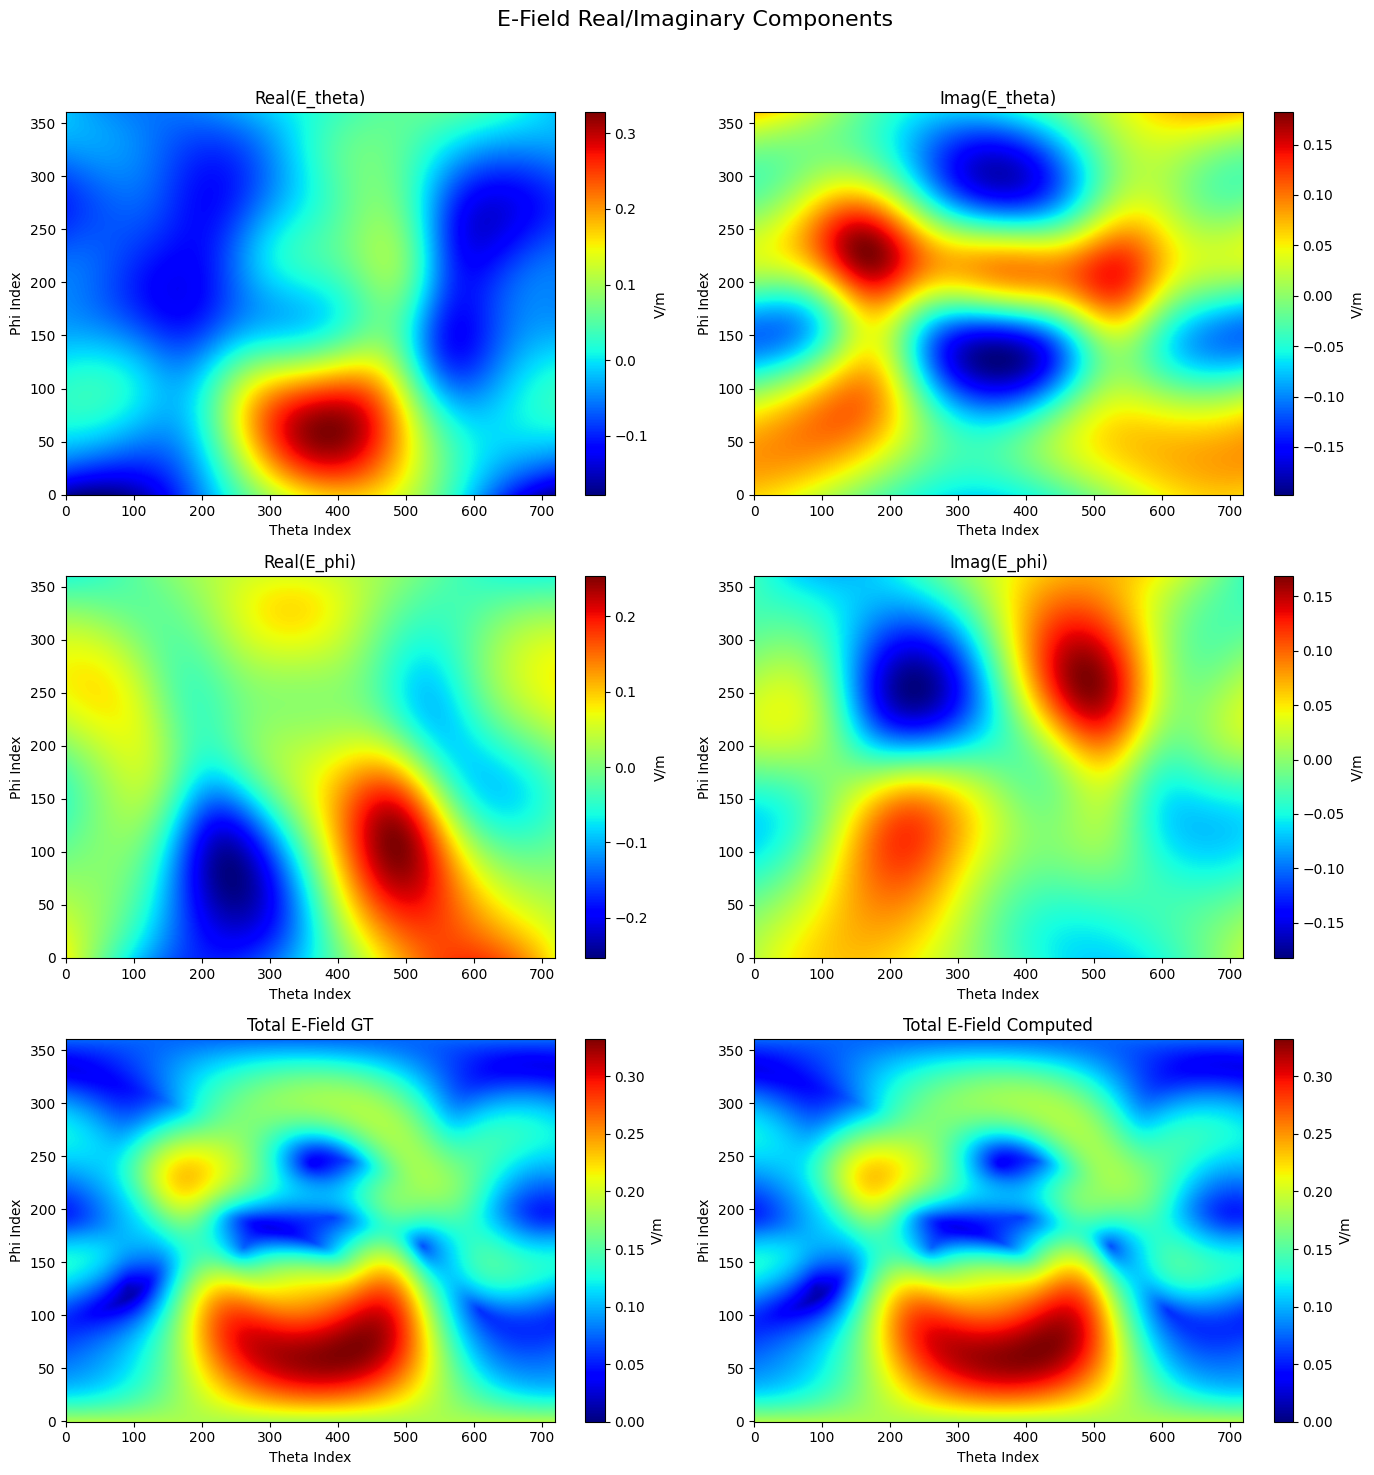

画图并保存到 b7fd_theta150phi30f0.51_RI.png 用时： 2.96s


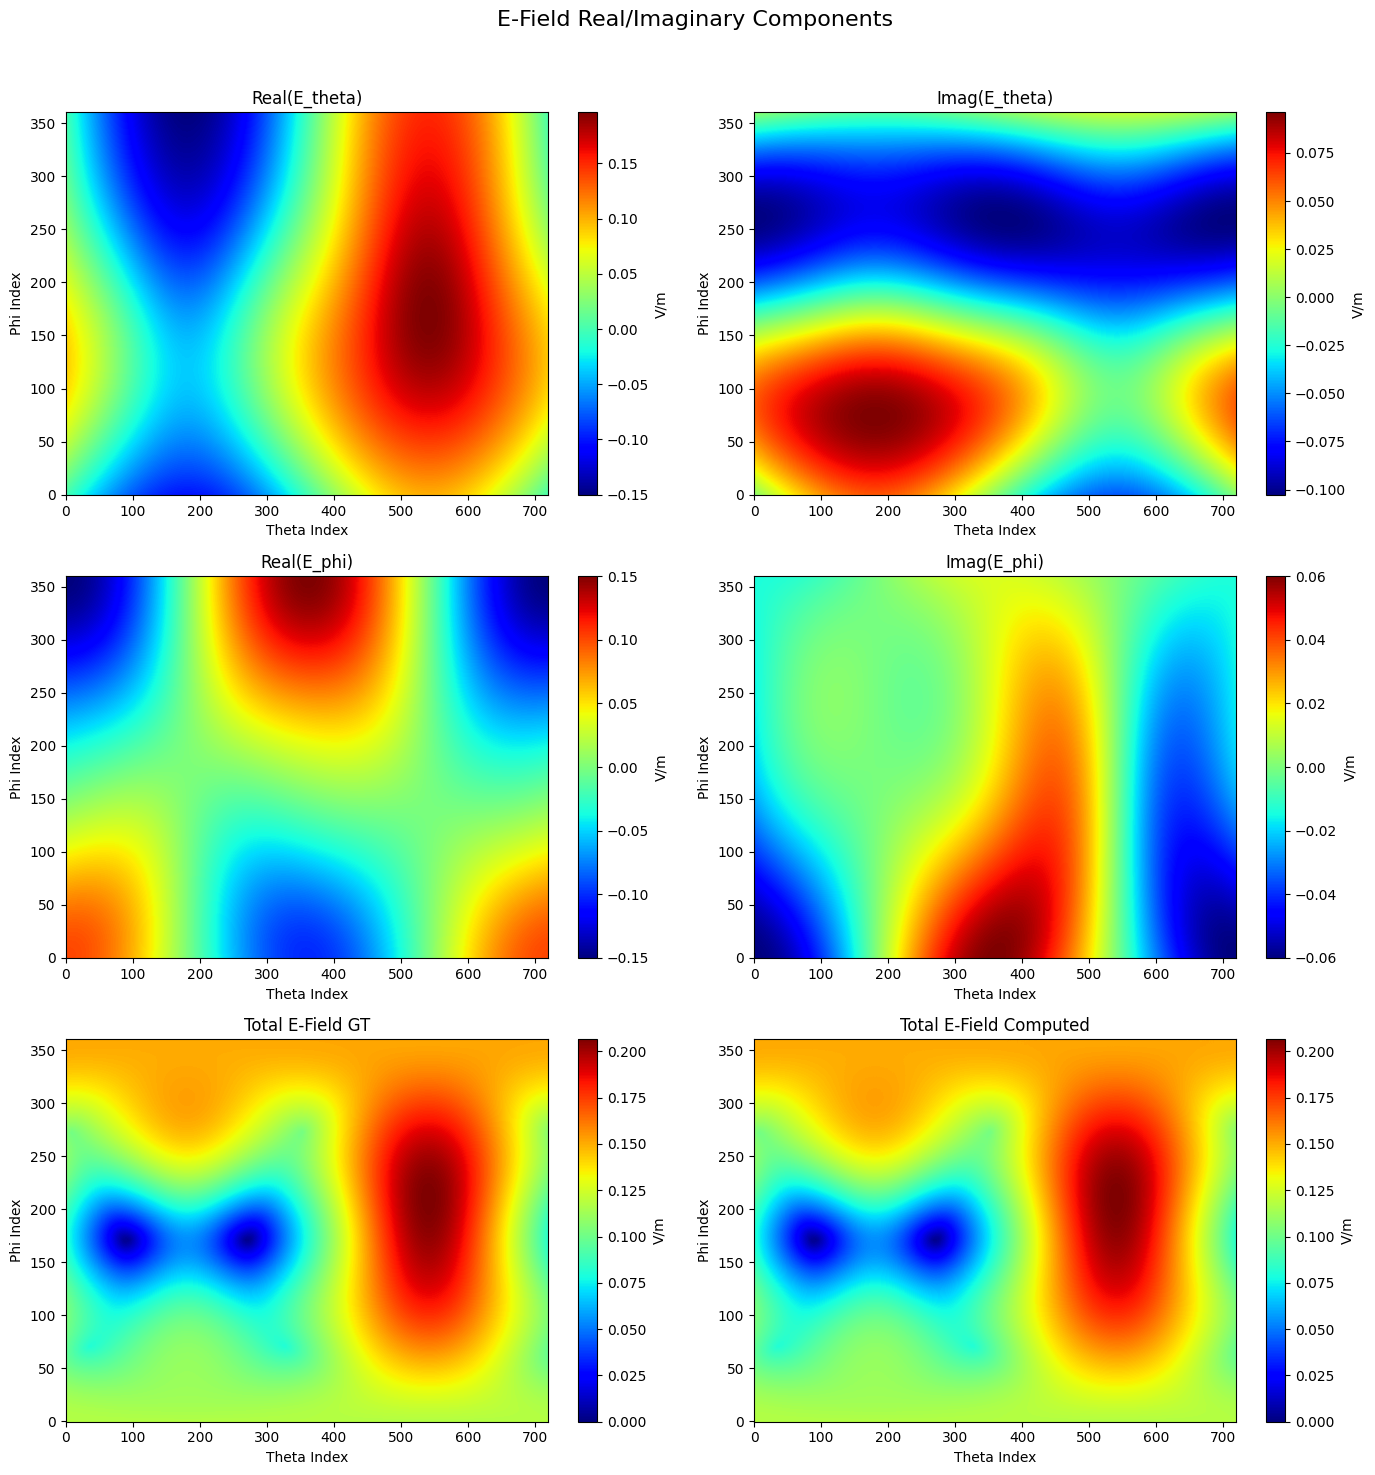

画图并保存到 b7fd_theta120phi90f0.18_RI.png 用时： 3.03s


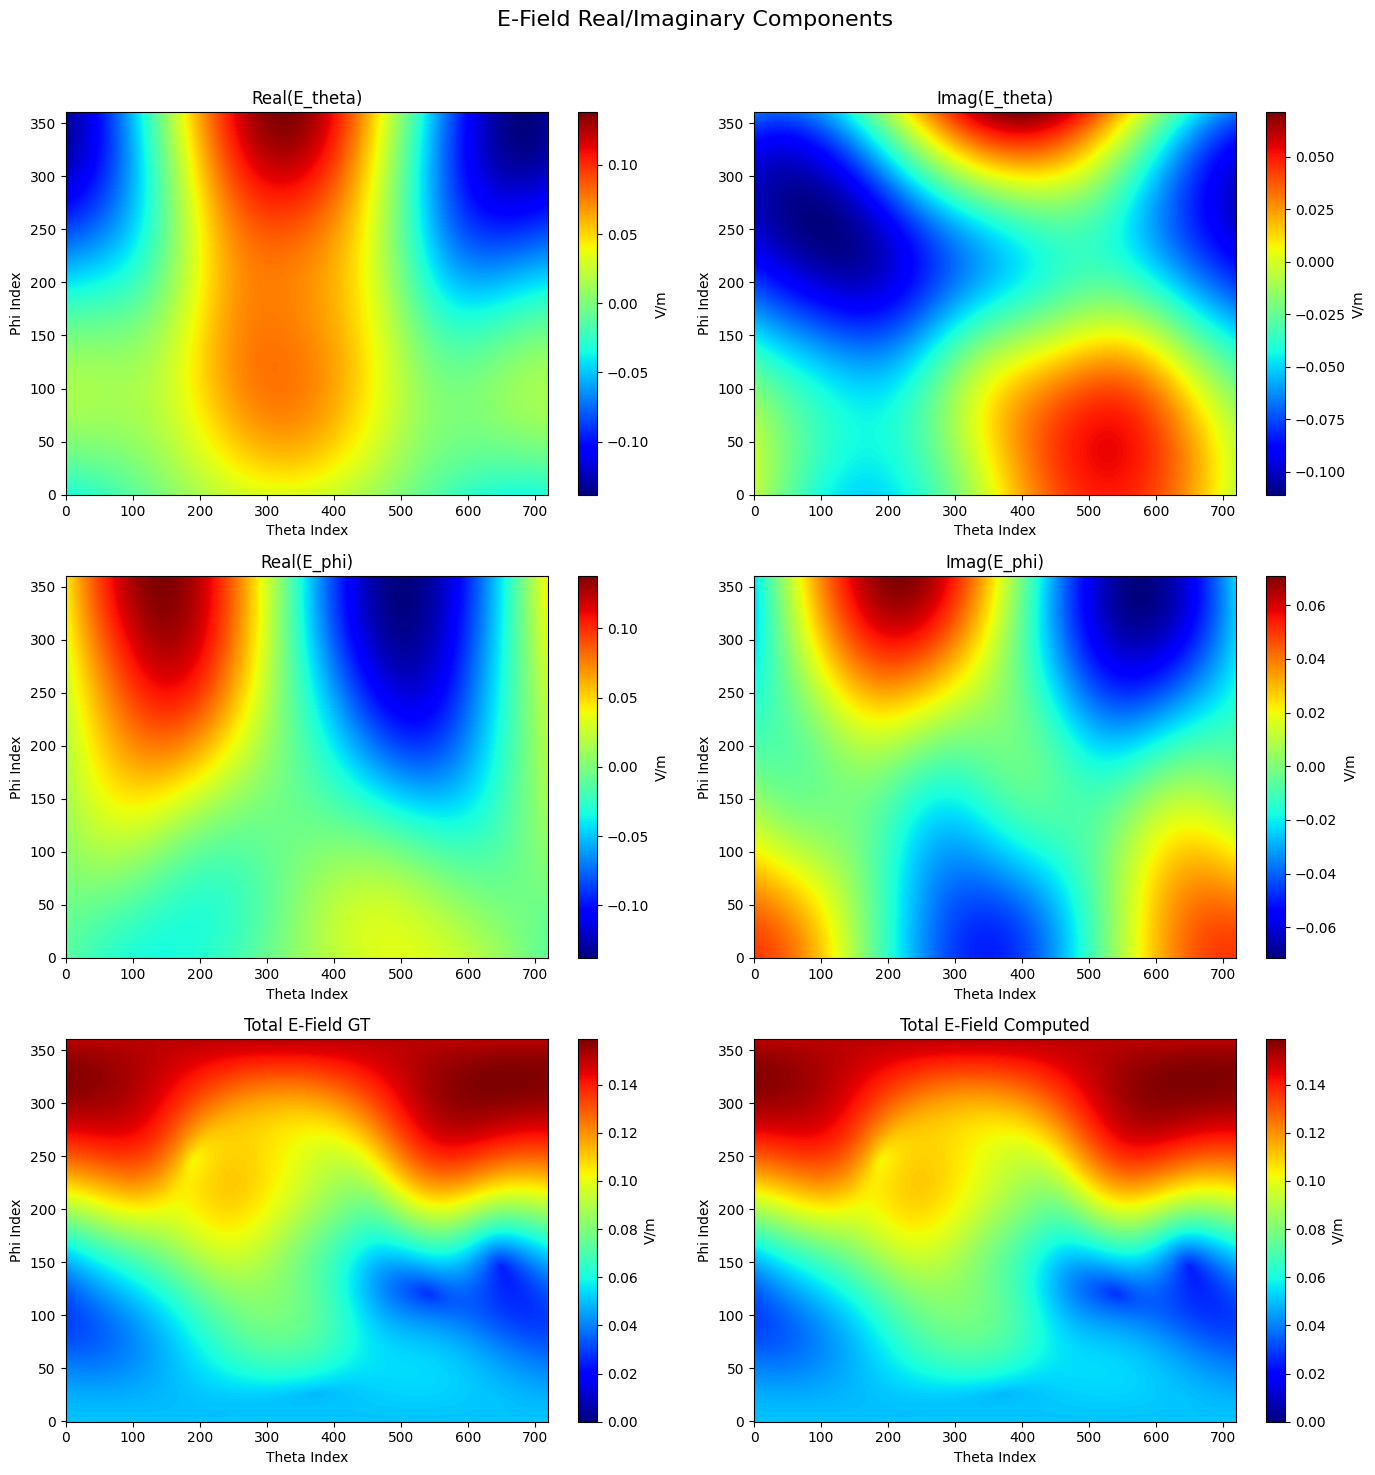

画图并保存到 b7fd_theta150phi330f0.19_RI.png 用时： 2.97s


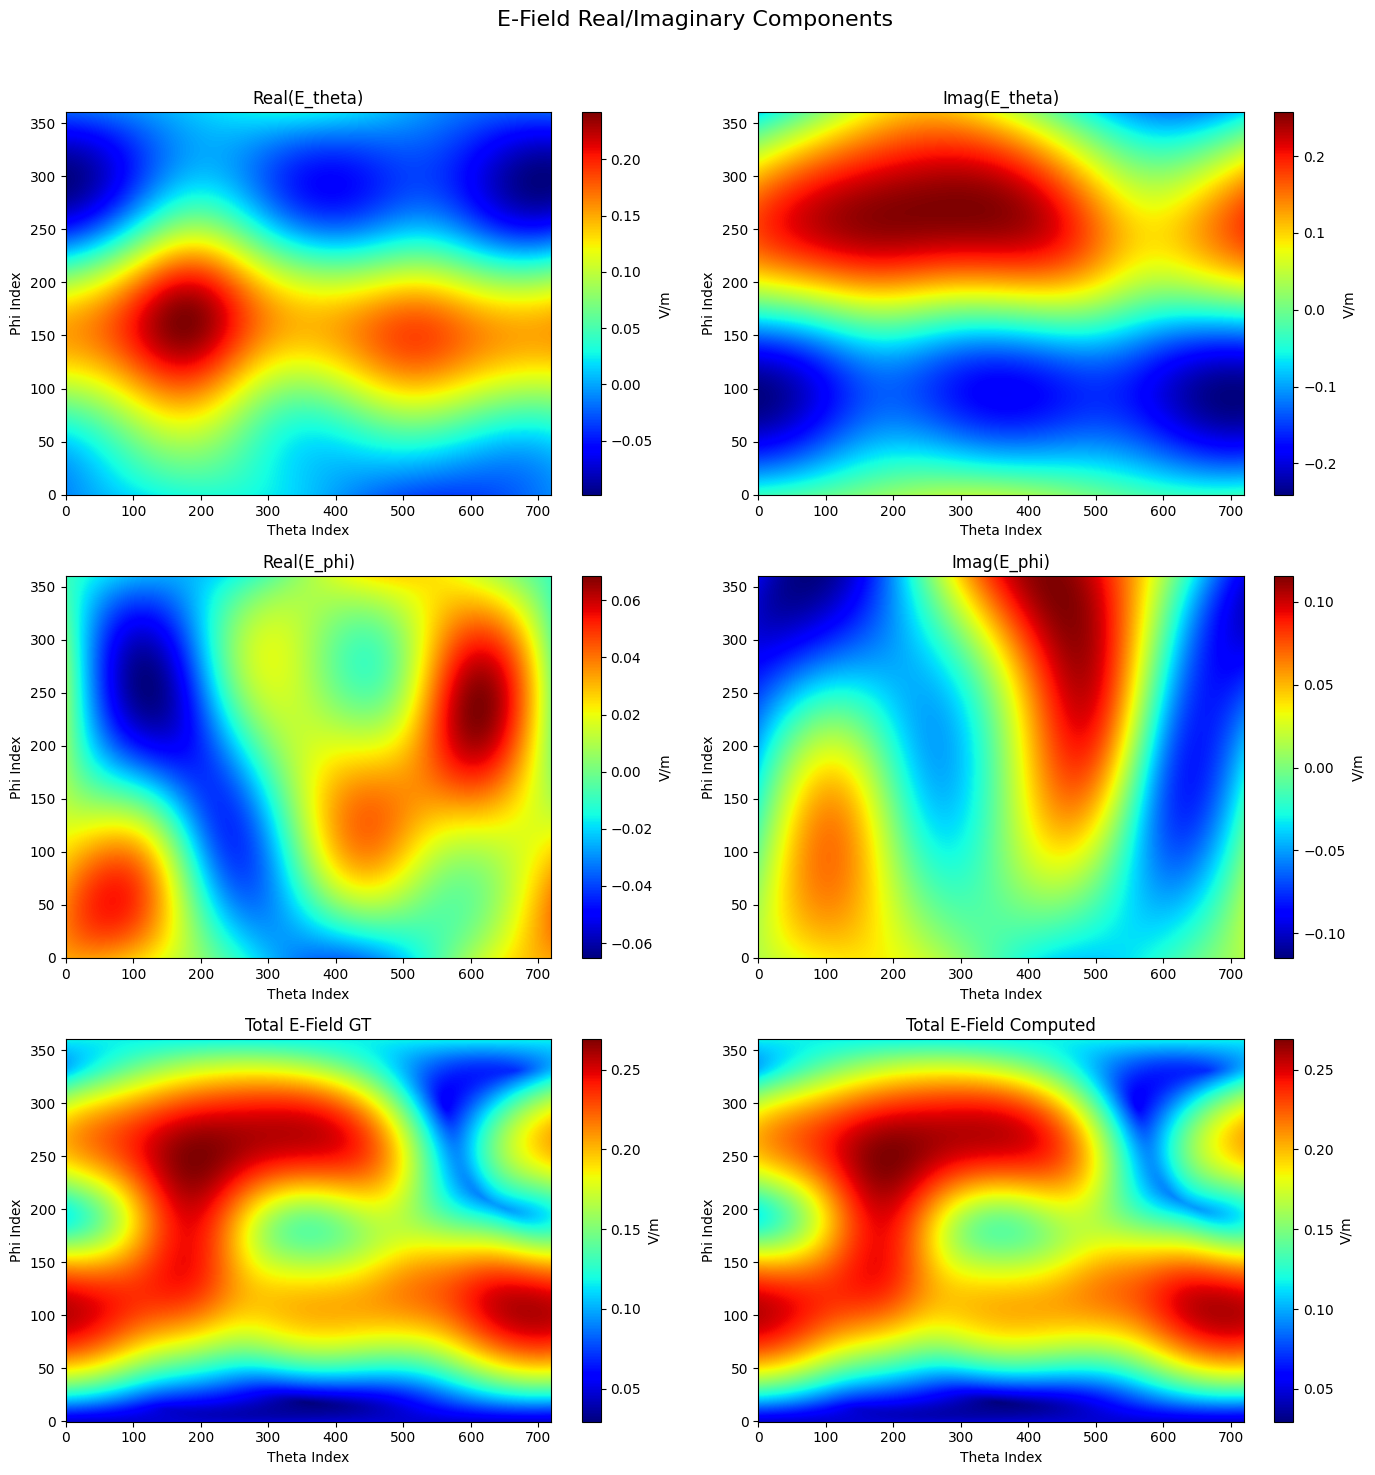

画图并保存到 b7fd_theta120phi120f0.27_RI.png 用时： 2.90s


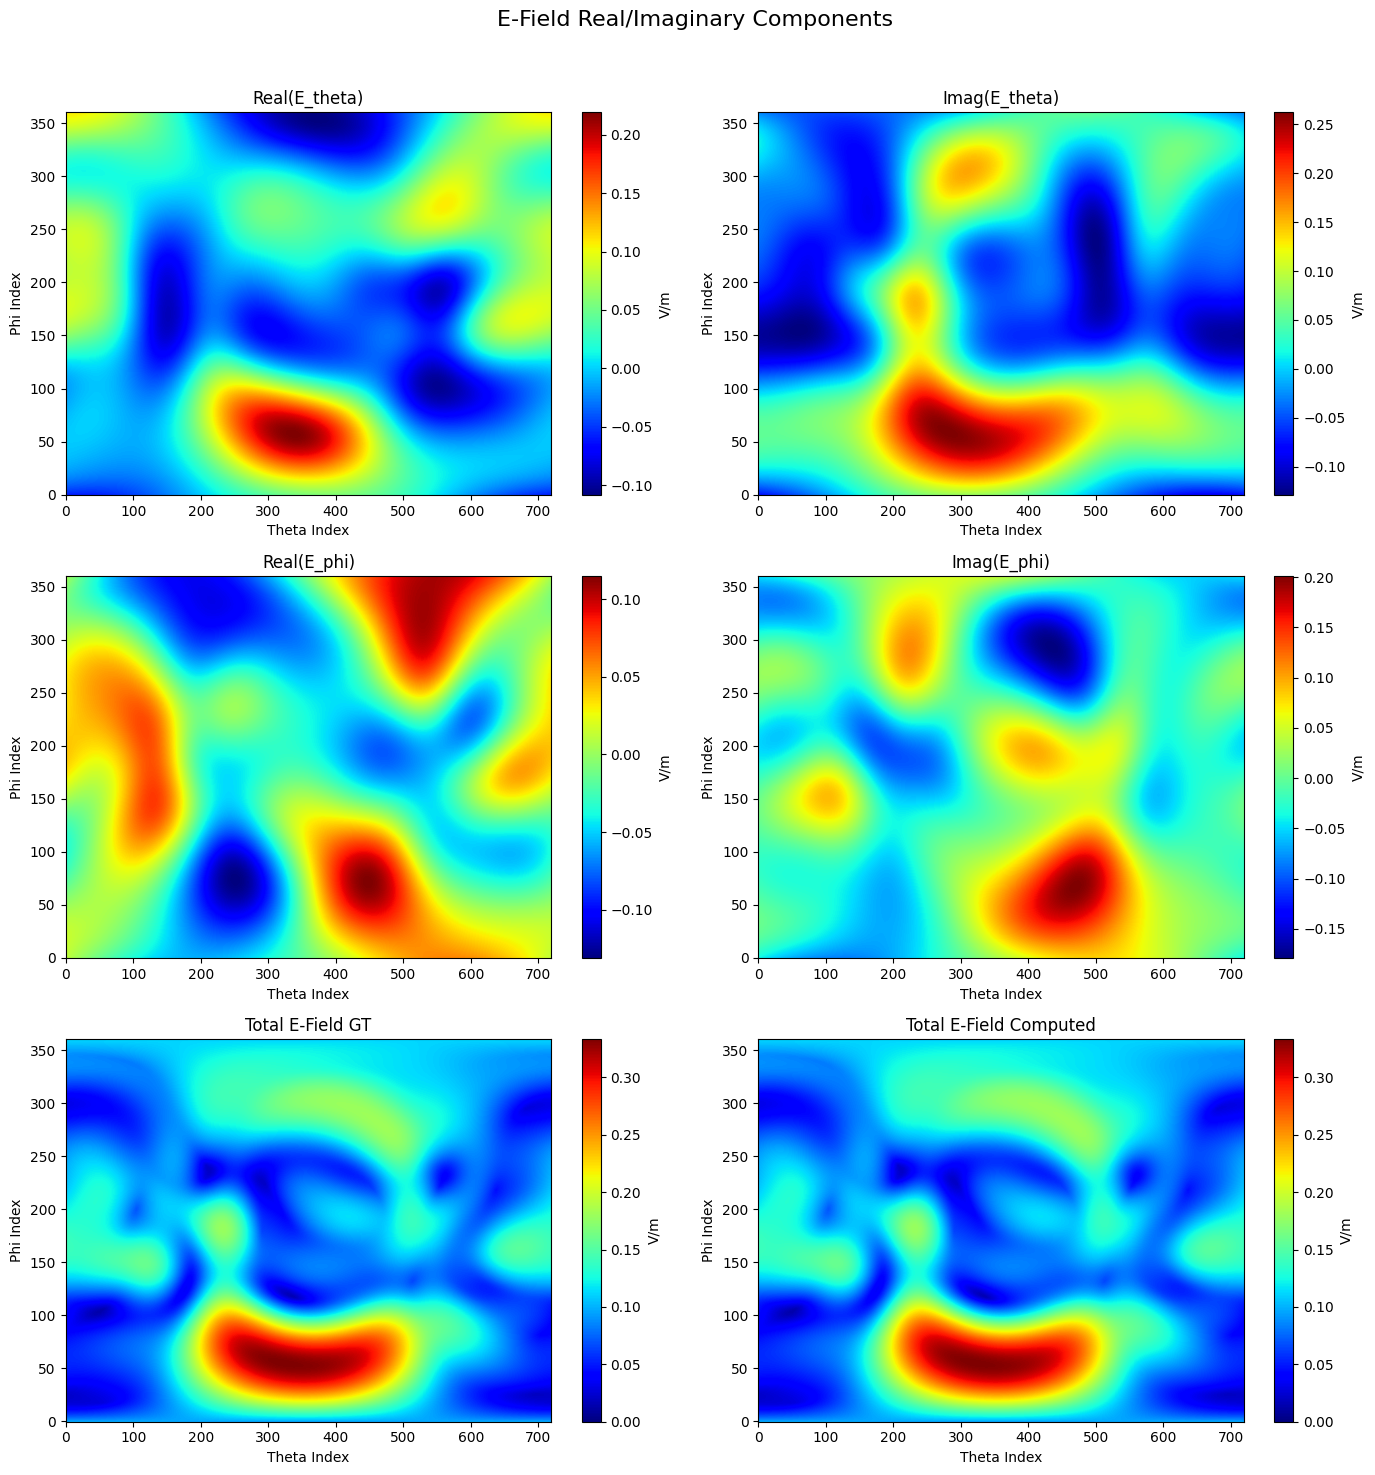

画图并保存到 b7fd_theta150phi330f0.76_RI.png 用时： 3.08s


In [3]:
import torch
import os
import time
import matplotlib.pyplot as plt

def plot_E_field_RealImage(ri_tensor_path, savedir, use_same_max=False, logger=None):
    """
    可视化Real-Image (实部-虚部) 4D张量，并与真值进行对比。

    Args:
        ri_tensor_path (str): 包含实部虚部信息的 .pt 文件路径。
        savedir (str): 图像保存的完整路径。
        use_same_max (bool): 如果为True，所有子图使用统一的颜色刻度范围。
        logger: 可选的日志记录器。
    """
    tic = time.time()
    
    # --- 1. 加载数据并分离实部虚部组件 ---
    try:
        ri_tensor = torch.load(ri_tensor_path, map_location=torch.device('cpu'))
    except FileNotFoundError:
        print(f"错误: Real-Image 文件未找到: {ri_tensor_path}")
        return

    E_theta_real = ri_tensor[:, :, 0]
    E_theta_imagine = ri_tensor[:, :, 1]
    E_phi_real = ri_tensor[:, :, 2]
    E_phi_imagine = ri_tensor[:, :, 3]

    # --- 2. 动态加载总场强的真值 (Ground Truth) ---
    # amphase_path = ri_tensor_path.replace('_RealImage/', '_Amphase/').replace('_RI.pt', '.pt')    
    amphase_path = os.path.join('/mnt/truenas_jiangxiaotian/Edataset/complexE_mie_Amphase/b7fd_E_mie_train', ri_tensor_path.split('/')[-1].replace('_RI.pt', '.pt')) # 兼容原始路径

    try:
        amphase_tensor_gt = torch.load(amphase_path, map_location=torch.device('cpu'))
        E_total_abs_gt = amphase_tensor_gt[:, :, 0]
    except FileNotFoundError:
        print(f"警告: 未找到对应的真值文件: {amphase_path}。总场强GT将无法绘制。")
        E_total_abs_gt = torch.zeros_like(E_theta_real)
    # E_total_abs_gt = torch.load('/mnt/truenas_jiangxiaotian/Edataset/complexE_mie_Amphase/b7fd_E_mie_train/b7fd_theta60phi30f0.39.pt')[:, :, 0] # 直接加载总场强的实部

    # --- 3. 从实部虚部正确计算总场强（极化椭圆长半轴）---
    E_abs_theta = torch.sqrt(E_theta_real**2 + E_theta_imagine**2)
    E_abs_phi = torch.sqrt(E_phi_real**2 + E_phi_imagine**2)
    E_phase_theta_rad = torch.atan2(E_theta_imagine, E_theta_real)
    E_phase_phi_rad = torch.atan2(E_phi_imagine, E_phi_real)
    delta_phi_rad = E_phase_theta_rad - E_phase_phi_rad
    E_abs_theta_sq = E_abs_theta**2
    E_abs_phi_sq = E_abs_phi**2
    term1 = E_abs_theta_sq + E_abs_phi_sq
    term2_inner_sqrt = torch.sqrt((E_abs_theta_sq - E_abs_phi_sq)**2 + 4 * E_abs_theta_sq * E_abs_phi_sq * (torch.cos(delta_phi_rad))**2)
    E_total_abs_sq = 0.5 * (term1 + term2_inner_sqrt)
    E_total_abs_compute = torch.sqrt(E_total_abs_sq)

    # --- 4. 准备绘图数据 ---
    fig, axes = plt.subplots(3, 2, figsize=(14, 15))
    fig.suptitle('E-Field Real/Imaginary Components', fontsize=16)

    components_data = [
        (E_theta_real, 'Real(E_theta)', 'V/m'),
        (E_theta_imagine, 'Imag(E_theta)', 'V/m'),
        (E_phi_real, 'Real(E_phi)', 'V/m'),
        (E_phi_imagine, 'Imag(E_phi)', 'V/m'),
        (E_total_abs_gt, 'Total E-Field GT', 'V/m'),
        (E_total_abs_compute, 'Total E-Field Computed', 'V/m')
    ]
    
    # --- 5. 新增功能：计算全局颜色范围 ---
    global_min, global_max = None, None
    if use_same_max:
        # 将所有6个张量的数据堆叠起来，高效地计算全局最大最小值
        all_tensors = [d[0] for d in components_data]
        stacked_data = torch.stack(all_tensors)
        global_min = stacked_data.min().item()
        global_max = stacked_data.max().item()
        print(f"启用全局颜色刻度: Min={global_min:.4f}, Max={global_max:.4f}")

    # --- 6. 绘制 3x2 六子图 ---
    ax_flat = axes.flatten()

    for i, (data, title, label) in enumerate(components_data):
        ax = ax_flat[i]
        
        # 根据 use_same_max 参数决定 vmin 和 vmax
        if use_same_max:
            vmin, vmax = global_min, global_max
        else:
            # 默认行为：只统一最后两个总场图的颜色范围 也不要了
            vmin, vmax = None, None
            # if 'Total E-Field' in title:
            #     vmin = min(E_total_abs_gt.min(), E_total_abs_compute.min()).item()
            #     vmax = max(E_total_abs_gt.max(), E_total_abs_compute.max()).item()

        im = ax.imshow(data.detach().cpu().numpy(), cmap='jet', origin='lower', aspect='auto', vmin=vmin, vmax=vmax)
        ax.set_title(title)
        ax.set_xlabel("Theta Index")
        ax.set_ylabel("Phi Index")
        fig.colorbar(im, ax=ax, label=label)

    # 调整布局防止重叠
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # 保存和显示图像
    plt.savefig(savedir)
    plt.show()
    plt.close(fig)

    if logger:
        logger.info(f'画图并保存到 {os.path.basename(savedir)} 用时：{time.time()-tic:.2f}s')
    else:
        print(f'画图并保存到 {os.path.basename(savedir)} 用时： {time.time()-tic:.2f}s')

# --- 主程序入口 ---
if __name__ == '__main__':
    # 定义包含 Real-Image 数据的 .pt 文件路径
    # ri_file_path = '/mnt/truenas_jiangxiaotian/Edataset/complexE_mie_RealImage/b7fd_E_mie_train/b7fd_theta60phi30f0.39_RI.pt'
    cnt = 10

    # gtdir = '/mnt/truenas_jiangxiaotian/Edataset/complexE_mie_RealImage/b7fd_E_mie_val'
    gtdir = '/mnt/truenas_jiangxiaotian/Edataset/complexE_mie_RealImage/testtrain'
    gtlist = os.listdir(gtdir)
    for ri_file_path in gtlist:
        output_image_path_default = f'{os.path.basename(ri_file_path).replace(".pt", ".png")}'
        plot_E_field_RealImage(os.path.join(gtdir, ri_file_path), output_image_path_default, use_same_max=False)
        cnt -= 1
        if cnt <= 0:
            break
    